# Experiments 16-18
### Hyperparameters: _Tiles 640 px / Model size / Epochs_


### Dataset:
- **Dataset:** 3.5m | 90º
- **Sizes:** small & mid
- **Split:** 640 px
- **Tags:** 5472 `plant-weed`
- **Train/Valid dist:** 66,6% / 33,3%

### Model 1:
- **Model:** `yolov8n` *(Nano)*
- **Epochs:** 100 / 1000
- **Batch:** 64
- **Freeze:** 10

### Model 2:
- **Model:** `yolov8m` *(Medium)*
- **Epochs:** 100
- **Batch:** 64
- **Freeze:** 10

### Experiments:
1. *Nano | 100 epochs*
2. *Medium | 100 epochs*
3. *Nano | 1000 epochs + Early stopping*

In [1]:
# CONFIG FOLDER PATH

# Get the project root directory (replace with your actual path)
project_root = "../../"
experiment_number = 1

# The folder you want to navigate to (relative to the root)
target_folder = f"docs/Experimentos/3 Hyperparams/{experiment_number} set/runs/detect/"

### Init

In [2]:
scale: int = 500 # size for graphs (in pixels)

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Construct the full path
target_path = os.path.join(project_root, target_folder)

# Change the current working directory
try:
    os.chdir(target_path)
    print(f"Current working directory: {os.getcwd()}")  # Verify
except FileNotFoundError:
    print(f"Error: Folder '{target_path}' not found. Check the path.")
except NotADirectoryError:
    print(f"Error: '{target_path}' is not a directory.")
except Exception as e:
    print(f"An error occurred: {e}")

Current working directory: /Users/alejandrolloveras/Documents/ESTUDIO/UBA/Trabajo Final/Desarrollo/docs/Experimentos/3 Hyperparams/1 set/runs/detect


In [5]:
# Reset to the root path
# os.chdir(project_root)
# print(f"Current working directory: {os.getcwd()}") #Verify

#### Functions

In [6]:
def graph_training_metrics(df: pd.DataFrame, graph: str="tight"):
    """
    Plots training and validation metrics from a training log DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing training metrics, including columns
                           'epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
                           'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
                           'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
                           'metrics/mAP50-95(B)', and optionally 'lr/pg0' for the 'lr' graph.
        graph (str, optional): Type of graph to display. Options are:
            - "tight": Displays loss and metrics in a single row.
            - "full": Displays loss and metrics in two rows.
            - "lr": Displays loss, metrics, and learning rate in three rows.
            Defaults to "tight".

    Raises:
        ValueError: If the 'graph' parameter is not one of "tight", "full", or "lr".
    """
    graph = graph.lower()

    # Tight view (one row)
    if graph == "tight":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 6))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(1, 2, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(1, 2, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Full view (two rows)
    elif graph == "full":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 12))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(2, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(2, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()

    # Shows also Lr graph (three rows)
    elif graph == "lr":
        # Configurar el tamaño de las figuras
        plt.figure(figsize=(15, 15))

        # Graficar pérdidas de entrenamiento y validación
        plt.subplot(3, 1, 1)
        plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss")
        plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss")
        plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss")
        plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle="dashed")
        plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.grid(True)
        plt.legend()

        # Graficar métricas de validación
        plt.subplot(3, 1, 2)
        plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
        plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
        plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
        plt.xlabel("Epoch")
        plt.ylabel("Metric Score")
        plt.title("Validation Metrics")
        plt.grid(True)
        plt.legend()


        # Gráfico de evolución del learning rate
        plt.subplot(3, 1, 3)
        plt.plot(df["epoch"], df["lr/pg0"], label="Learning Rate (pg0)", color="cadetblue", marker='.', linestyle='-')
        plt.xlabel("Epoch")
        plt.ylabel("Learning Rate")
        plt.title("Learning Rate Evolution")
        plt.grid(True)

    else:
        raise ValueError(f"Invalid graph parameter: '{graph}'. Must be one of 'tight', 'full', or 'lr'.")

    plt.tight_layout()
    plt.show()

In [7]:
def graph_LrLoss(df):
    """Generates a 3D plot of Learning Rate vs. Loss vs. Epoch."""

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Data
    epochs = df['epoch']
    losses = df['val/cls_loss']  # or df['train/cls_loss'], or combined as needed.
    lrs = df['lr/pg0']

    # Scatter plot
    ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis', marker='o')

    # Labels
    ax.set_xlabel('Learning Rate (lr/pg0)')
    ax.set_ylabel('Classification Loss (val/cls_loss)')
    ax.set_zlabel('Epoch')
    ax.set_title('3D Plot: Learning Rate vs. Loss vs. Epoch')

    # Color bar
    fig.colorbar(ax.scatter(lrs, losses, epochs, c=losses, cmap='viridis'), label='Loss Value')

    plt.show()

In [8]:
def graph_LrLoss_3D(df, set: str='val'):
    """Generates an interactive 3D plot of Learning Rate vs. Loss vs. Epoch."""

    if set.lower() == 'val':
        print("Validation set")
        loss_set = 'val/cls_loss'
        title_set = 'Validation'
    elif set.lower() == 'train':
        print("Training set")
        loss_set = 'train/cls_loss'
        title_set = 'Train'
    else:
        print("Debe indicarse el set de entrenamiento: set debe ser igual 'val' o 'train'")
        return  

    fig = go.Figure(data=[go.Scatter3d(
        x=df['lr/pg0'],
        y=df[loss_set],
        z=df['epoch'],
        mode='markers',
        marker=dict(
            size=5,
            color=df[loss_set], # color based on loss value
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Loss Value')  # Add colorbar
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis=dict(title='Learning Rate (lr/pg0)'),
            yaxis=dict(title=f'Classification Loss ({loss_set})'),
            zaxis=dict(title='Epoch'),
        ),
        title=f'Learning Rate vs. {title_set} Loss vs. Epoch'
    )

    fig.show()

----

# Experimentos

## Experiment 16
### *Nano | 100 epochs*

In [9]:
folder = "train/"

In [10]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df1 = pd.read_csv(file_path)
df1.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,493.994,2.19629,1.73173,1.47661,0.46960,0.42191,0.41171,0.14045,2.32694,1.54170,1.37283,0.000119,0.000119,0.000119
96,97,498.224,2.19126,1.70384,1.47668,0.46894,0.41968,0.40718,0.13966,2.32451,1.53849,1.37574,0.000099,0.000099,0.000099
97,98,503.387,2.16897,1.70655,1.47043,0.47380,0.42134,0.40915,0.14085,2.32709,1.53765,1.37859,0.000079,0.000079,0.000079
98,99,508.382,2.15537,1.68192,1.46511,0.47557,0.42009,0.41139,0.14196,2.32908,1.53195,1.37896,0.000060,0.000060,0.000060
99,100,512.485,2.19834,1.72868,1.48747,0.48591,0.42022,0.41778,0.14278,2.32773,1.52857,1.37744,0.000040,0.000040,0.000040


***NOTE:***
- `lr/pg0` typically refers to the learning rate for the backbone weights.
- `lr/pg1` is usually associated with the learning rate for the YOLO layers' weights.
- `lr/pg2` often represents the learning rate for any additional parameters, such as biases.

In [11]:
last_row = df1.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 8.541 min


### Graphs

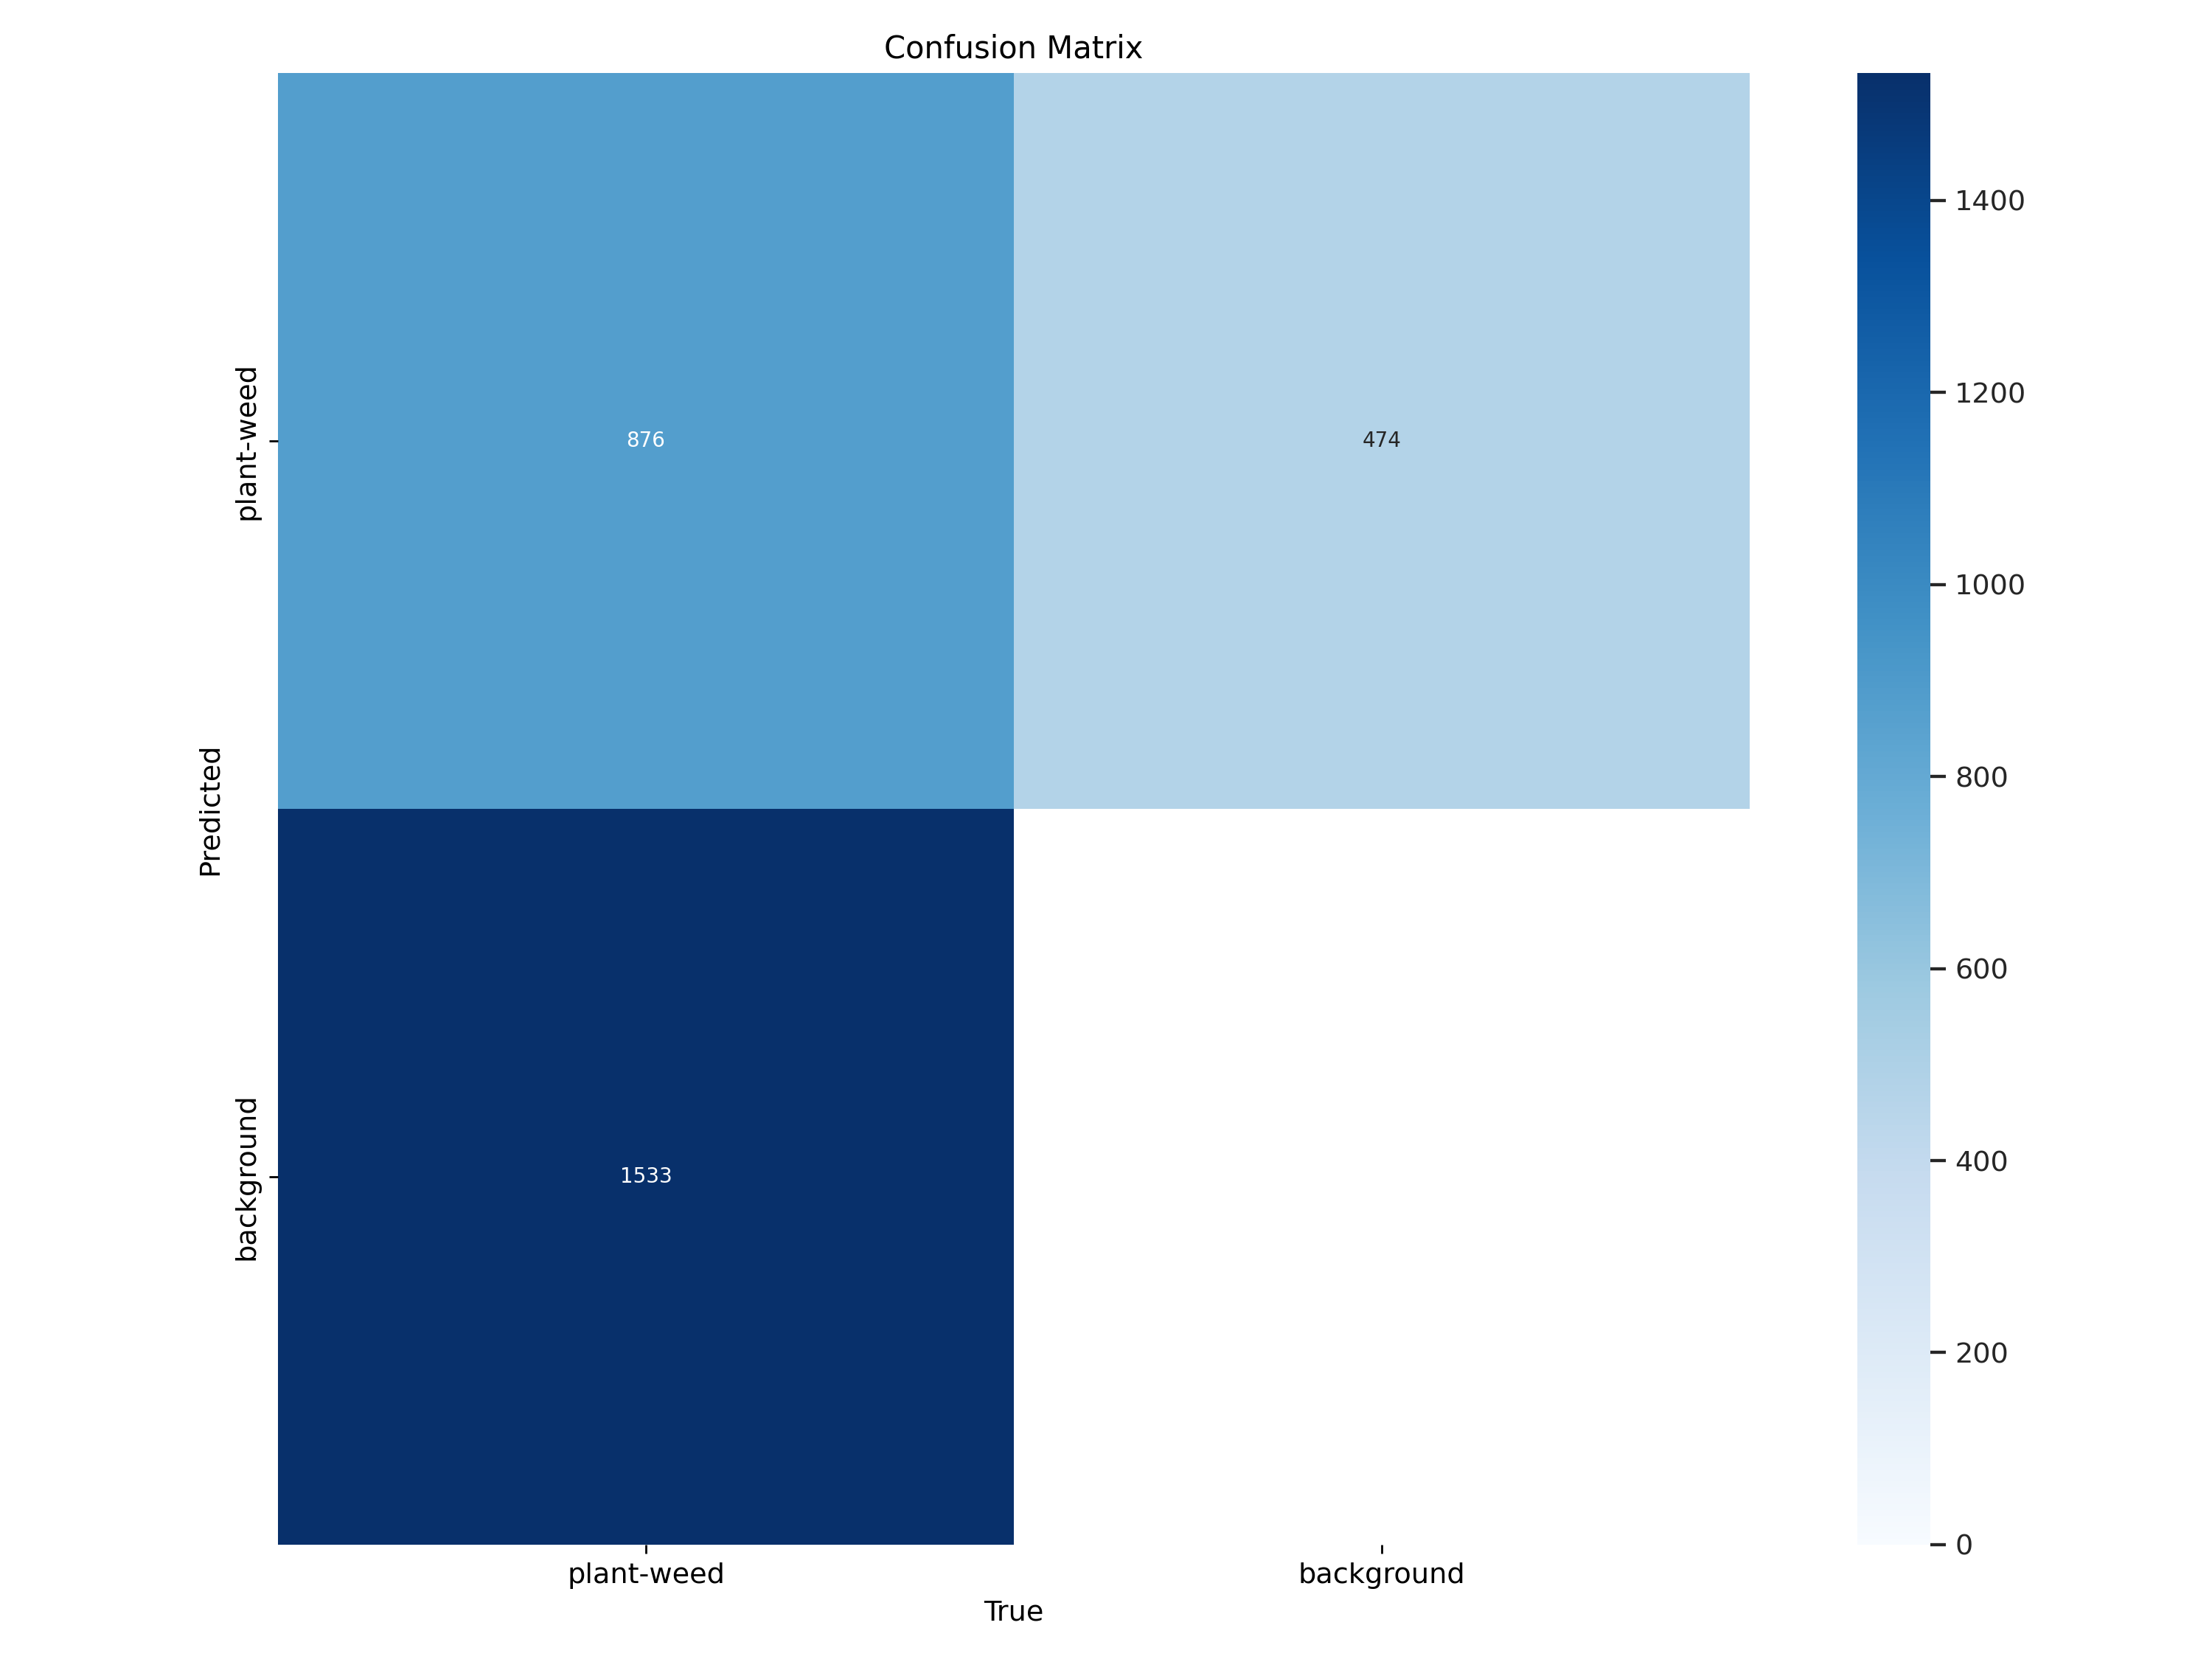

In [12]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

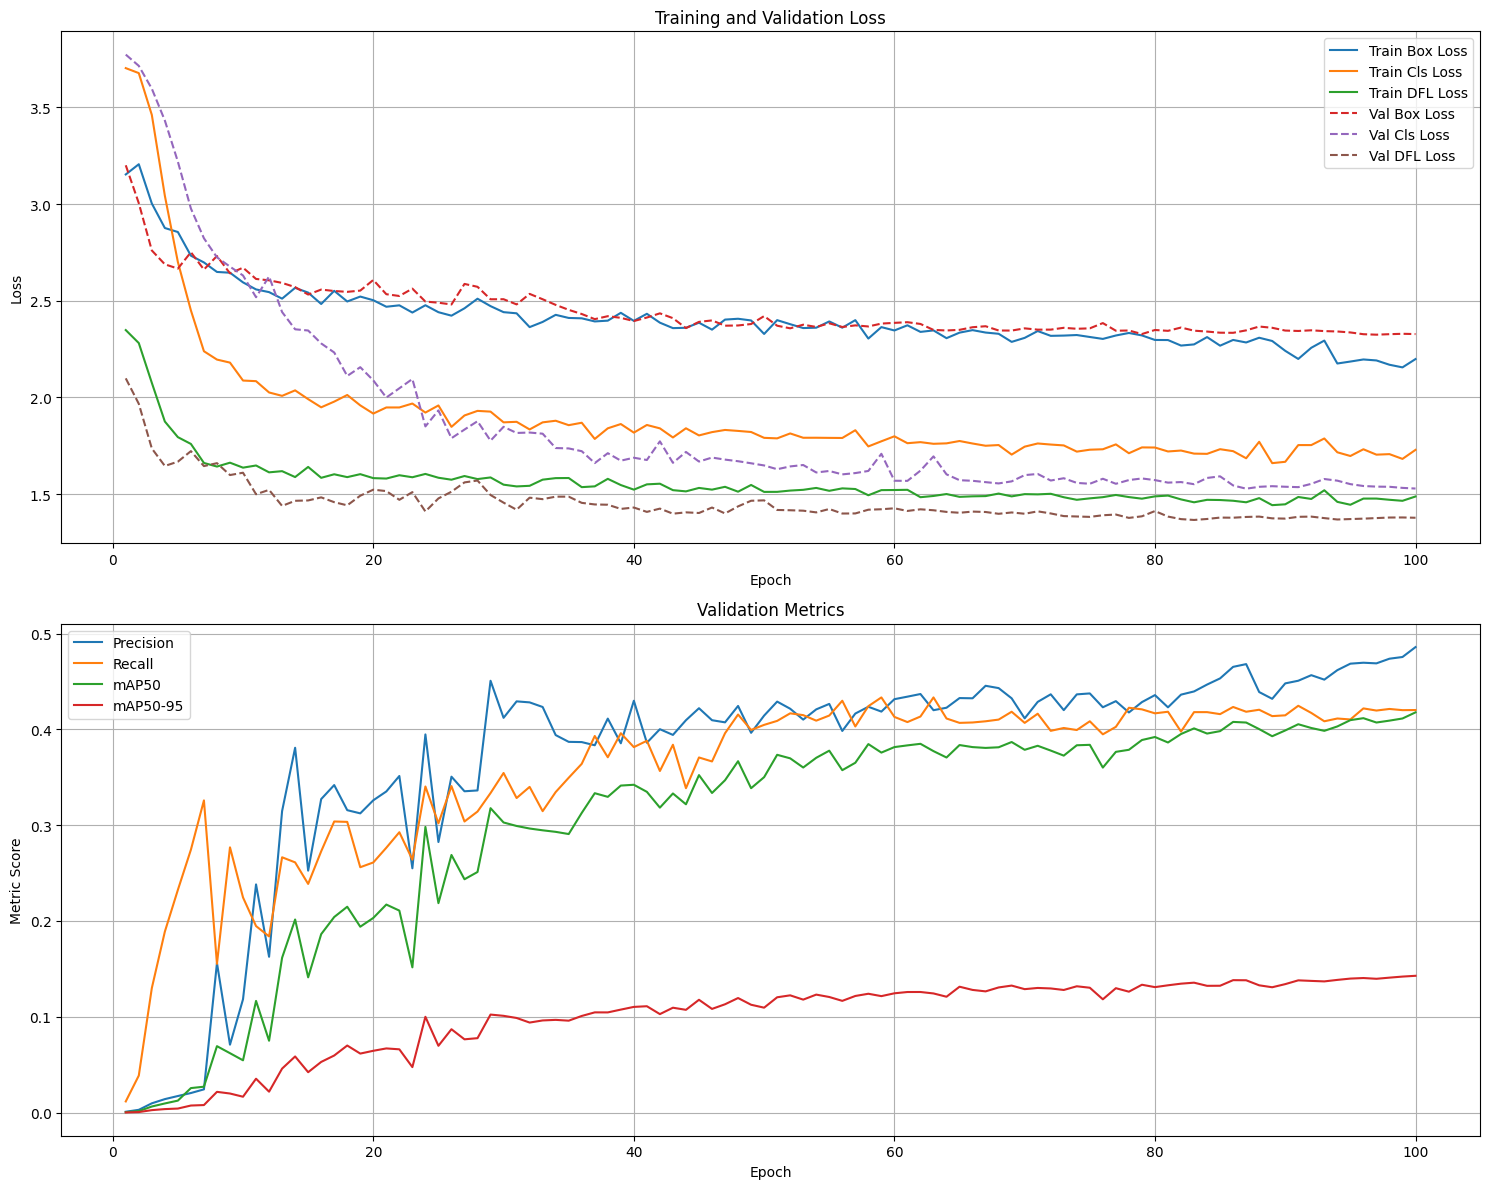

In [13]:
graph_training_metrics(df1, graph="full")

In [14]:
graph_LrLoss_3D(df1)

Validation set


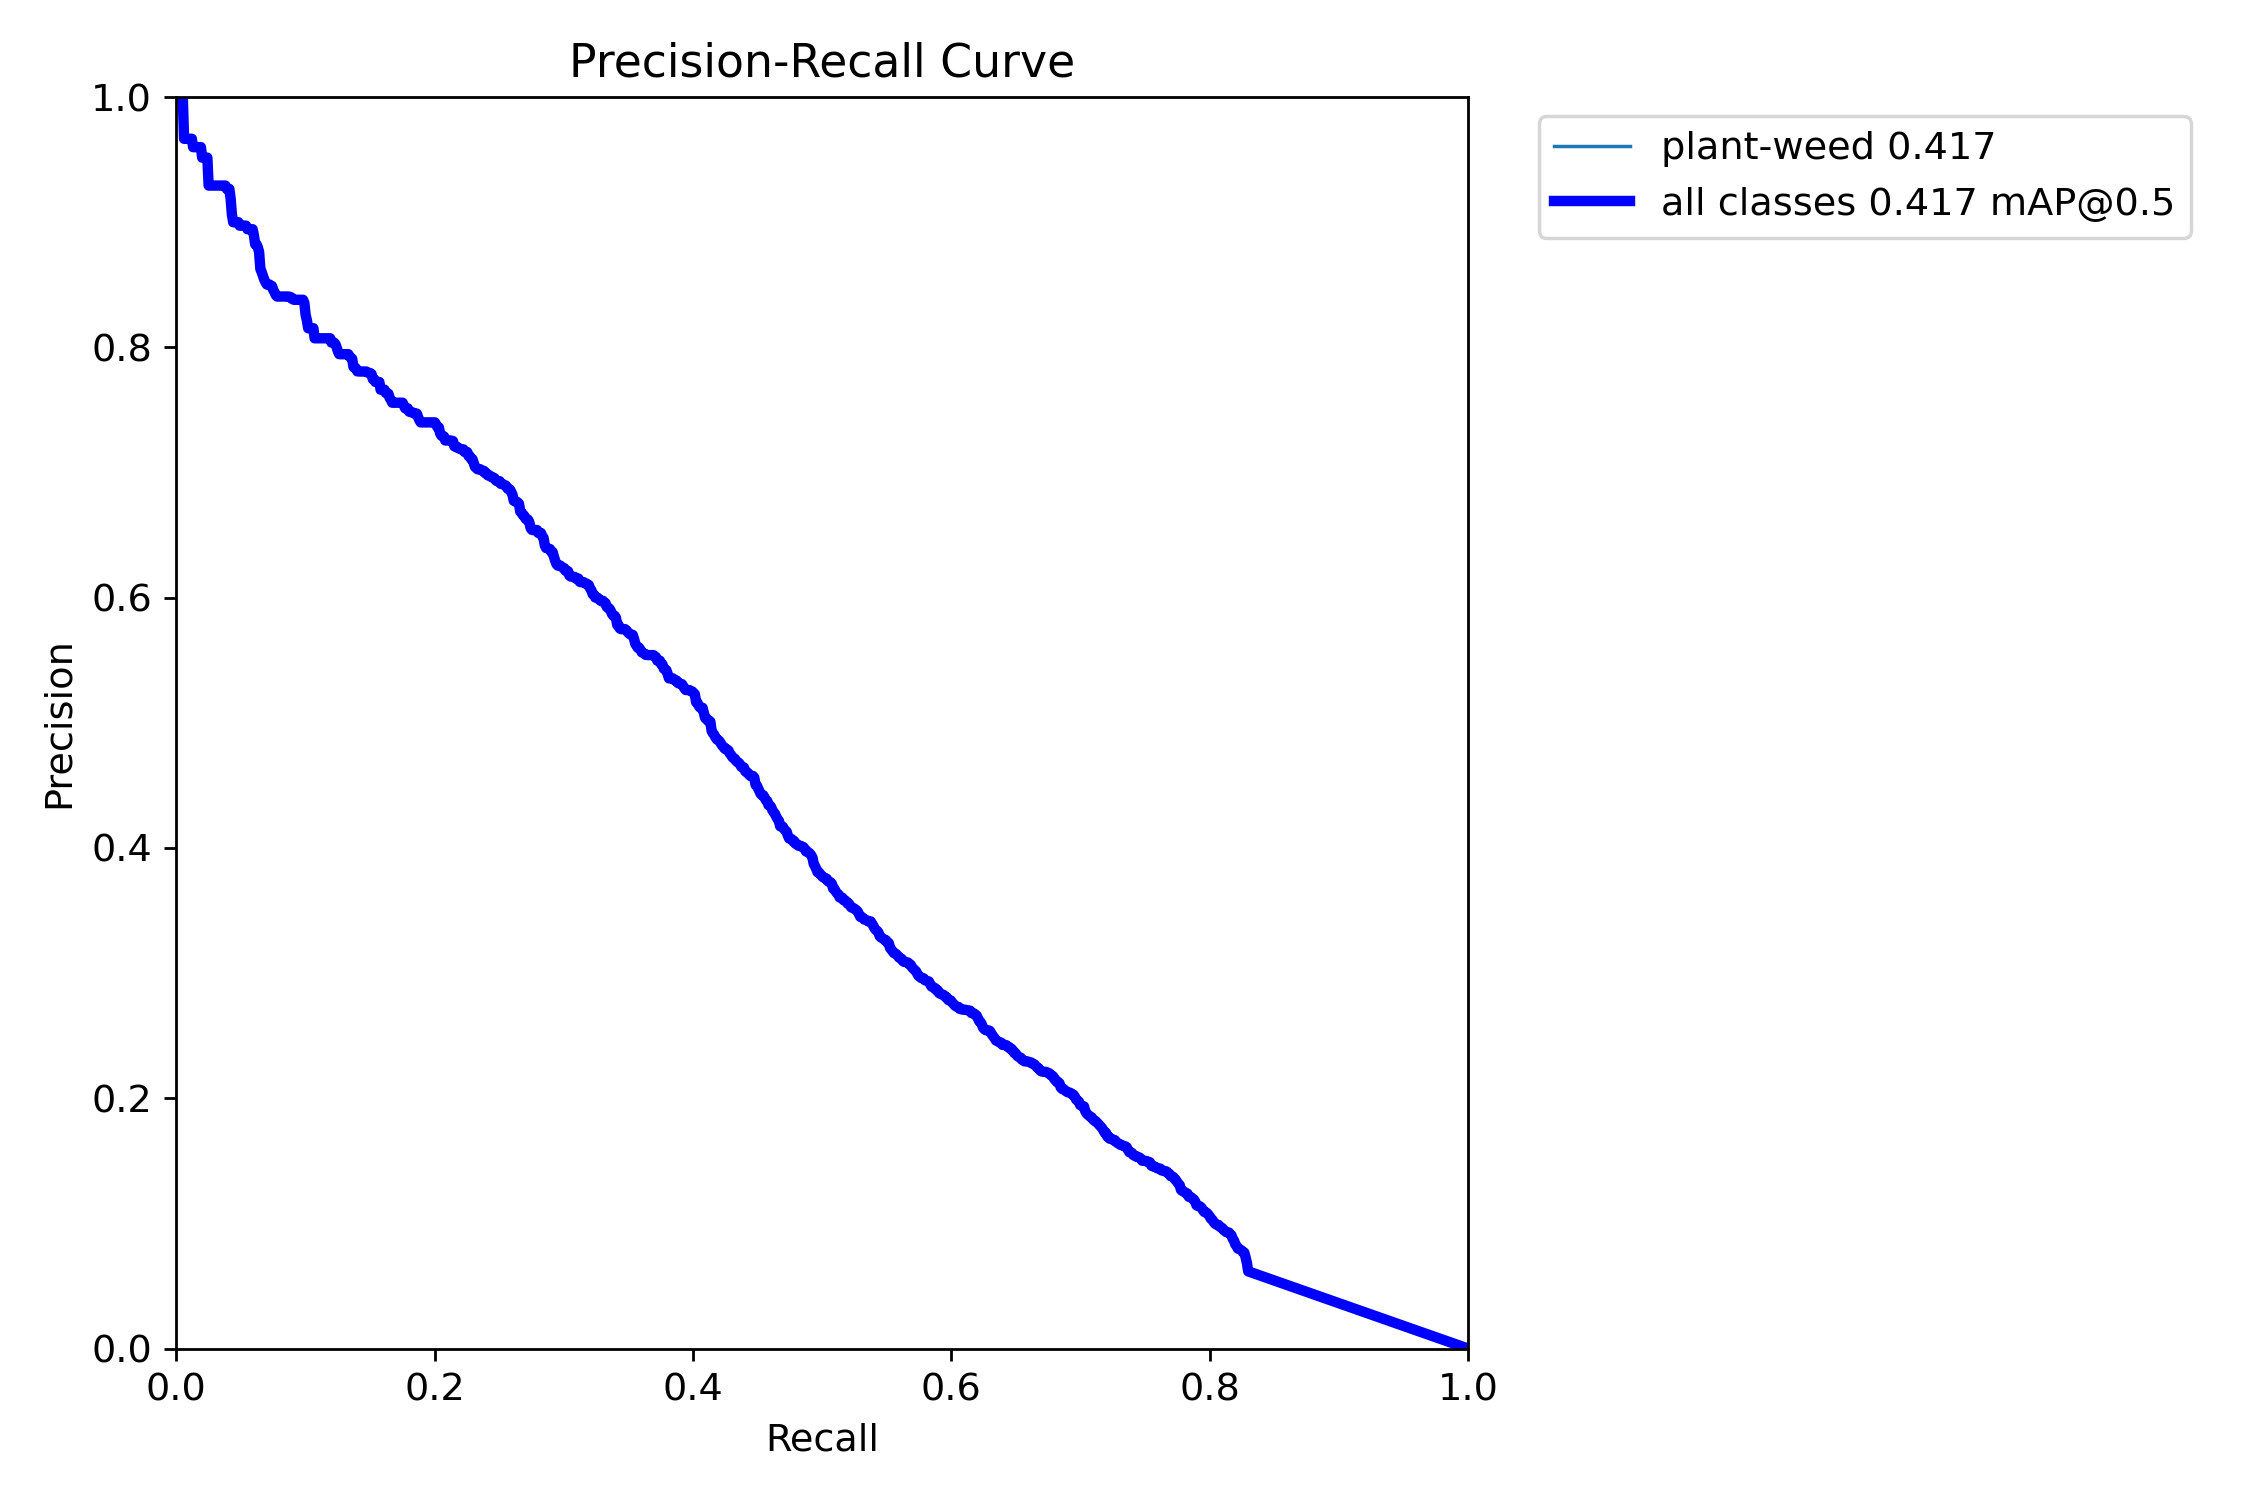

In [15]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

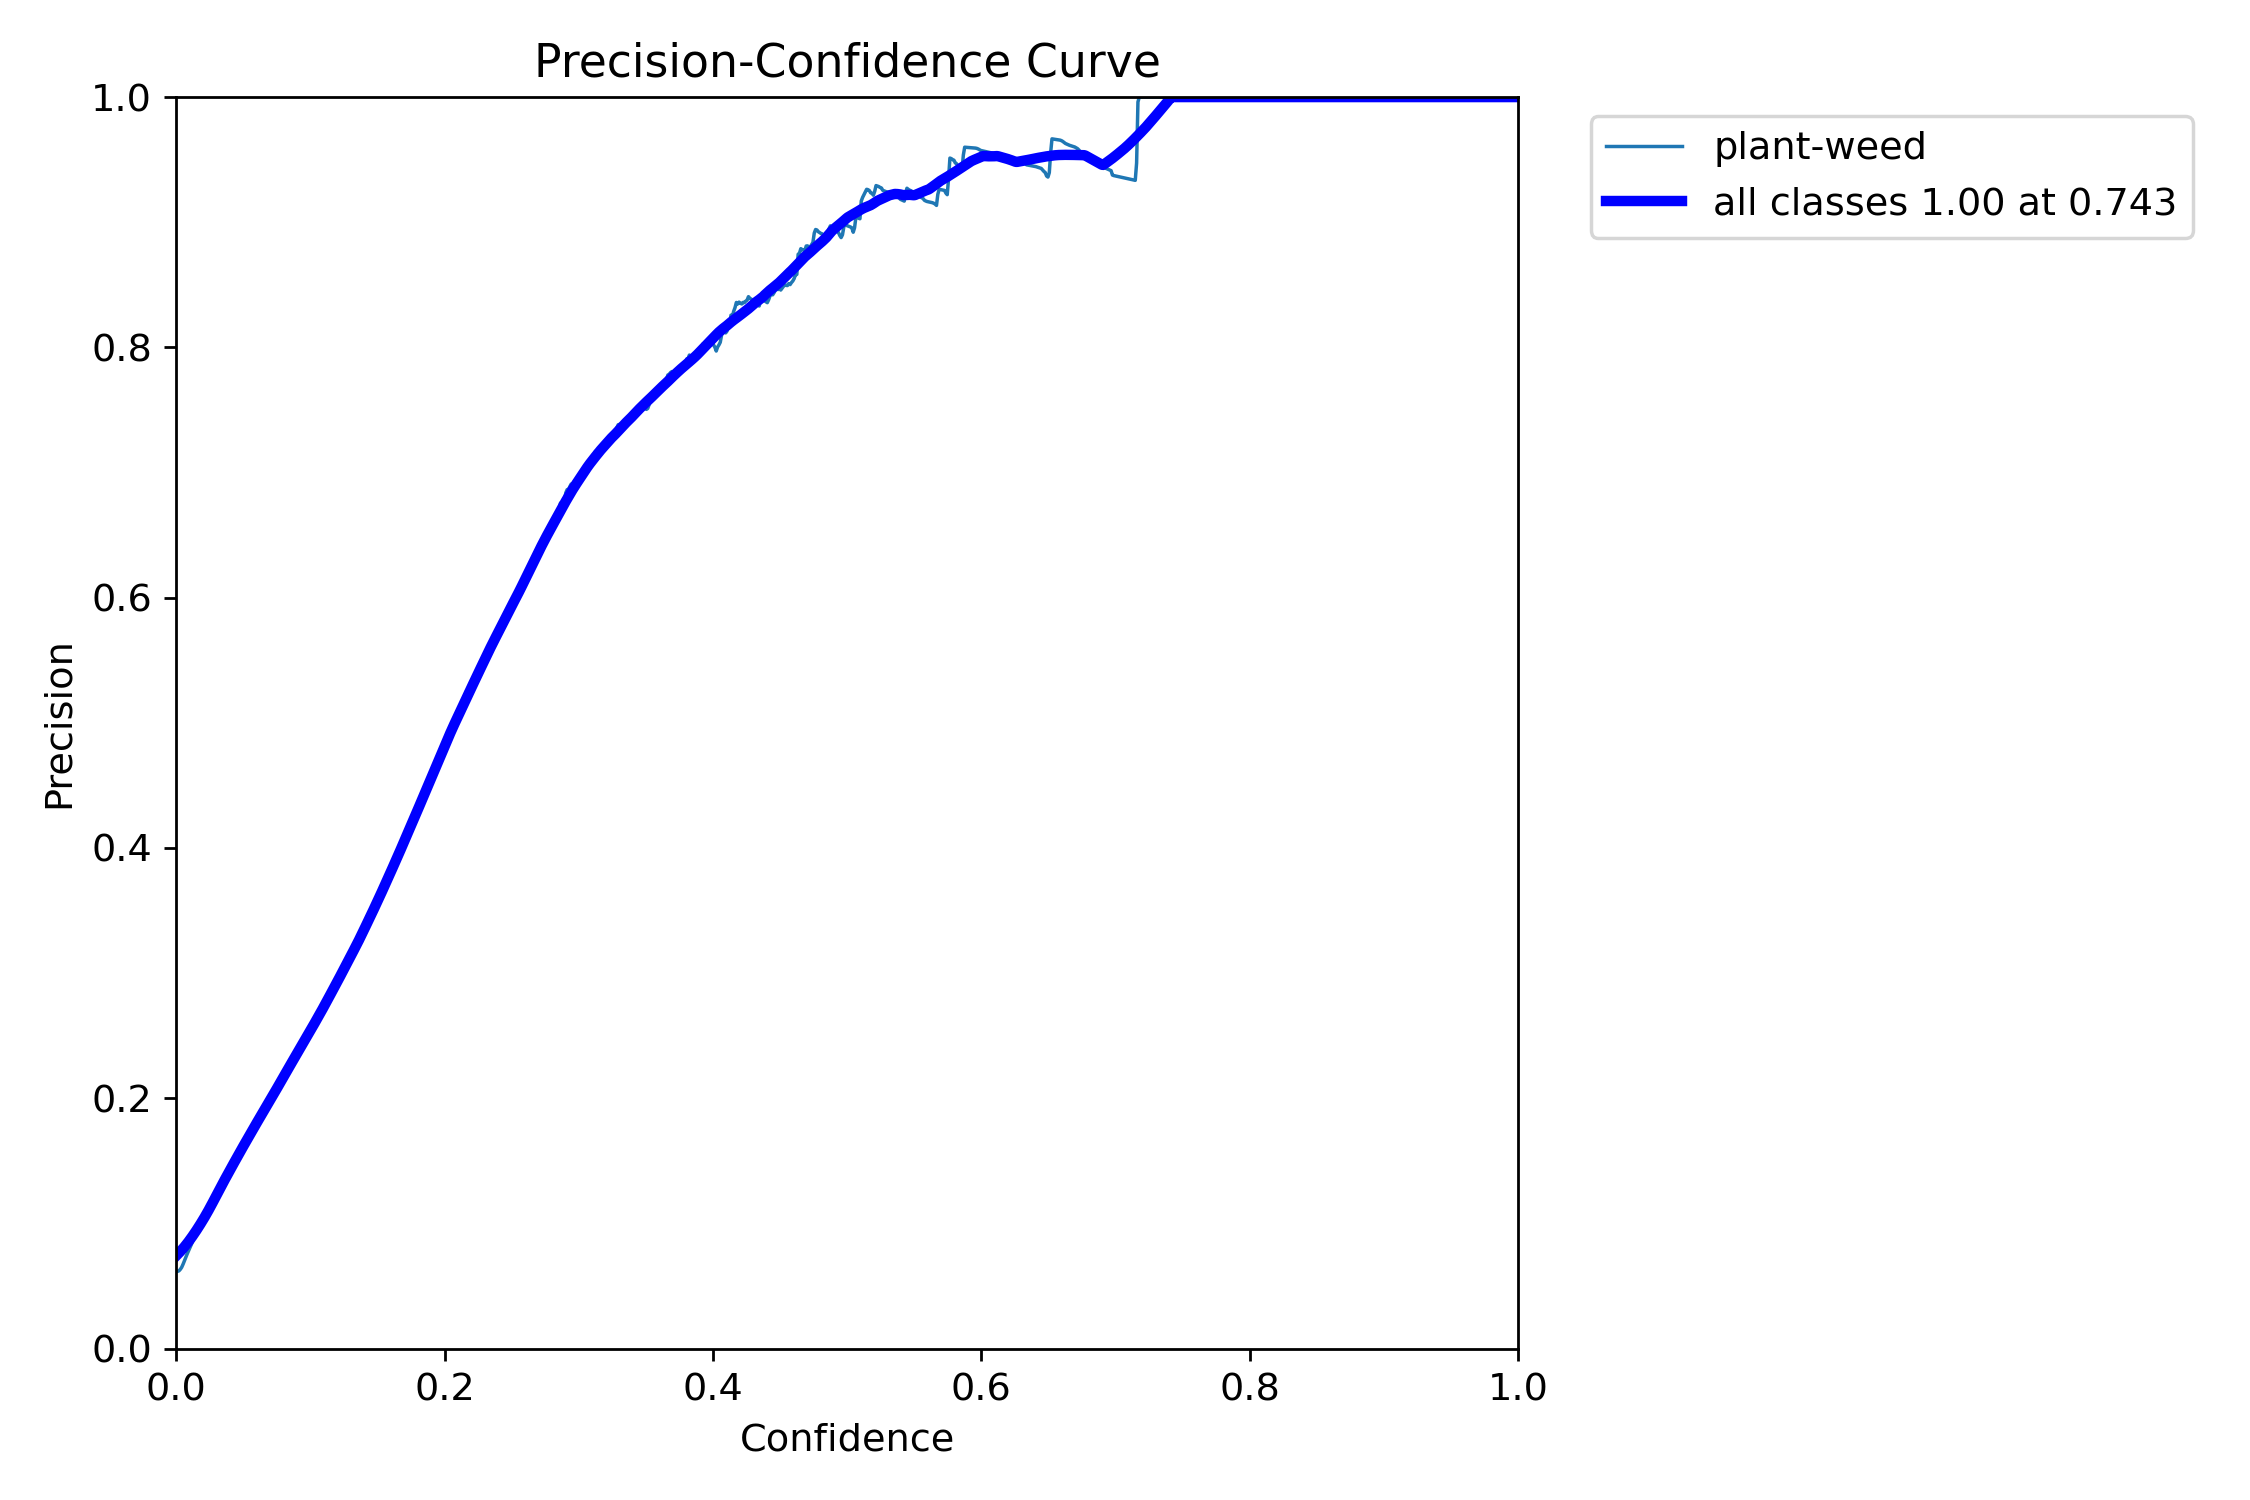

In [16]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

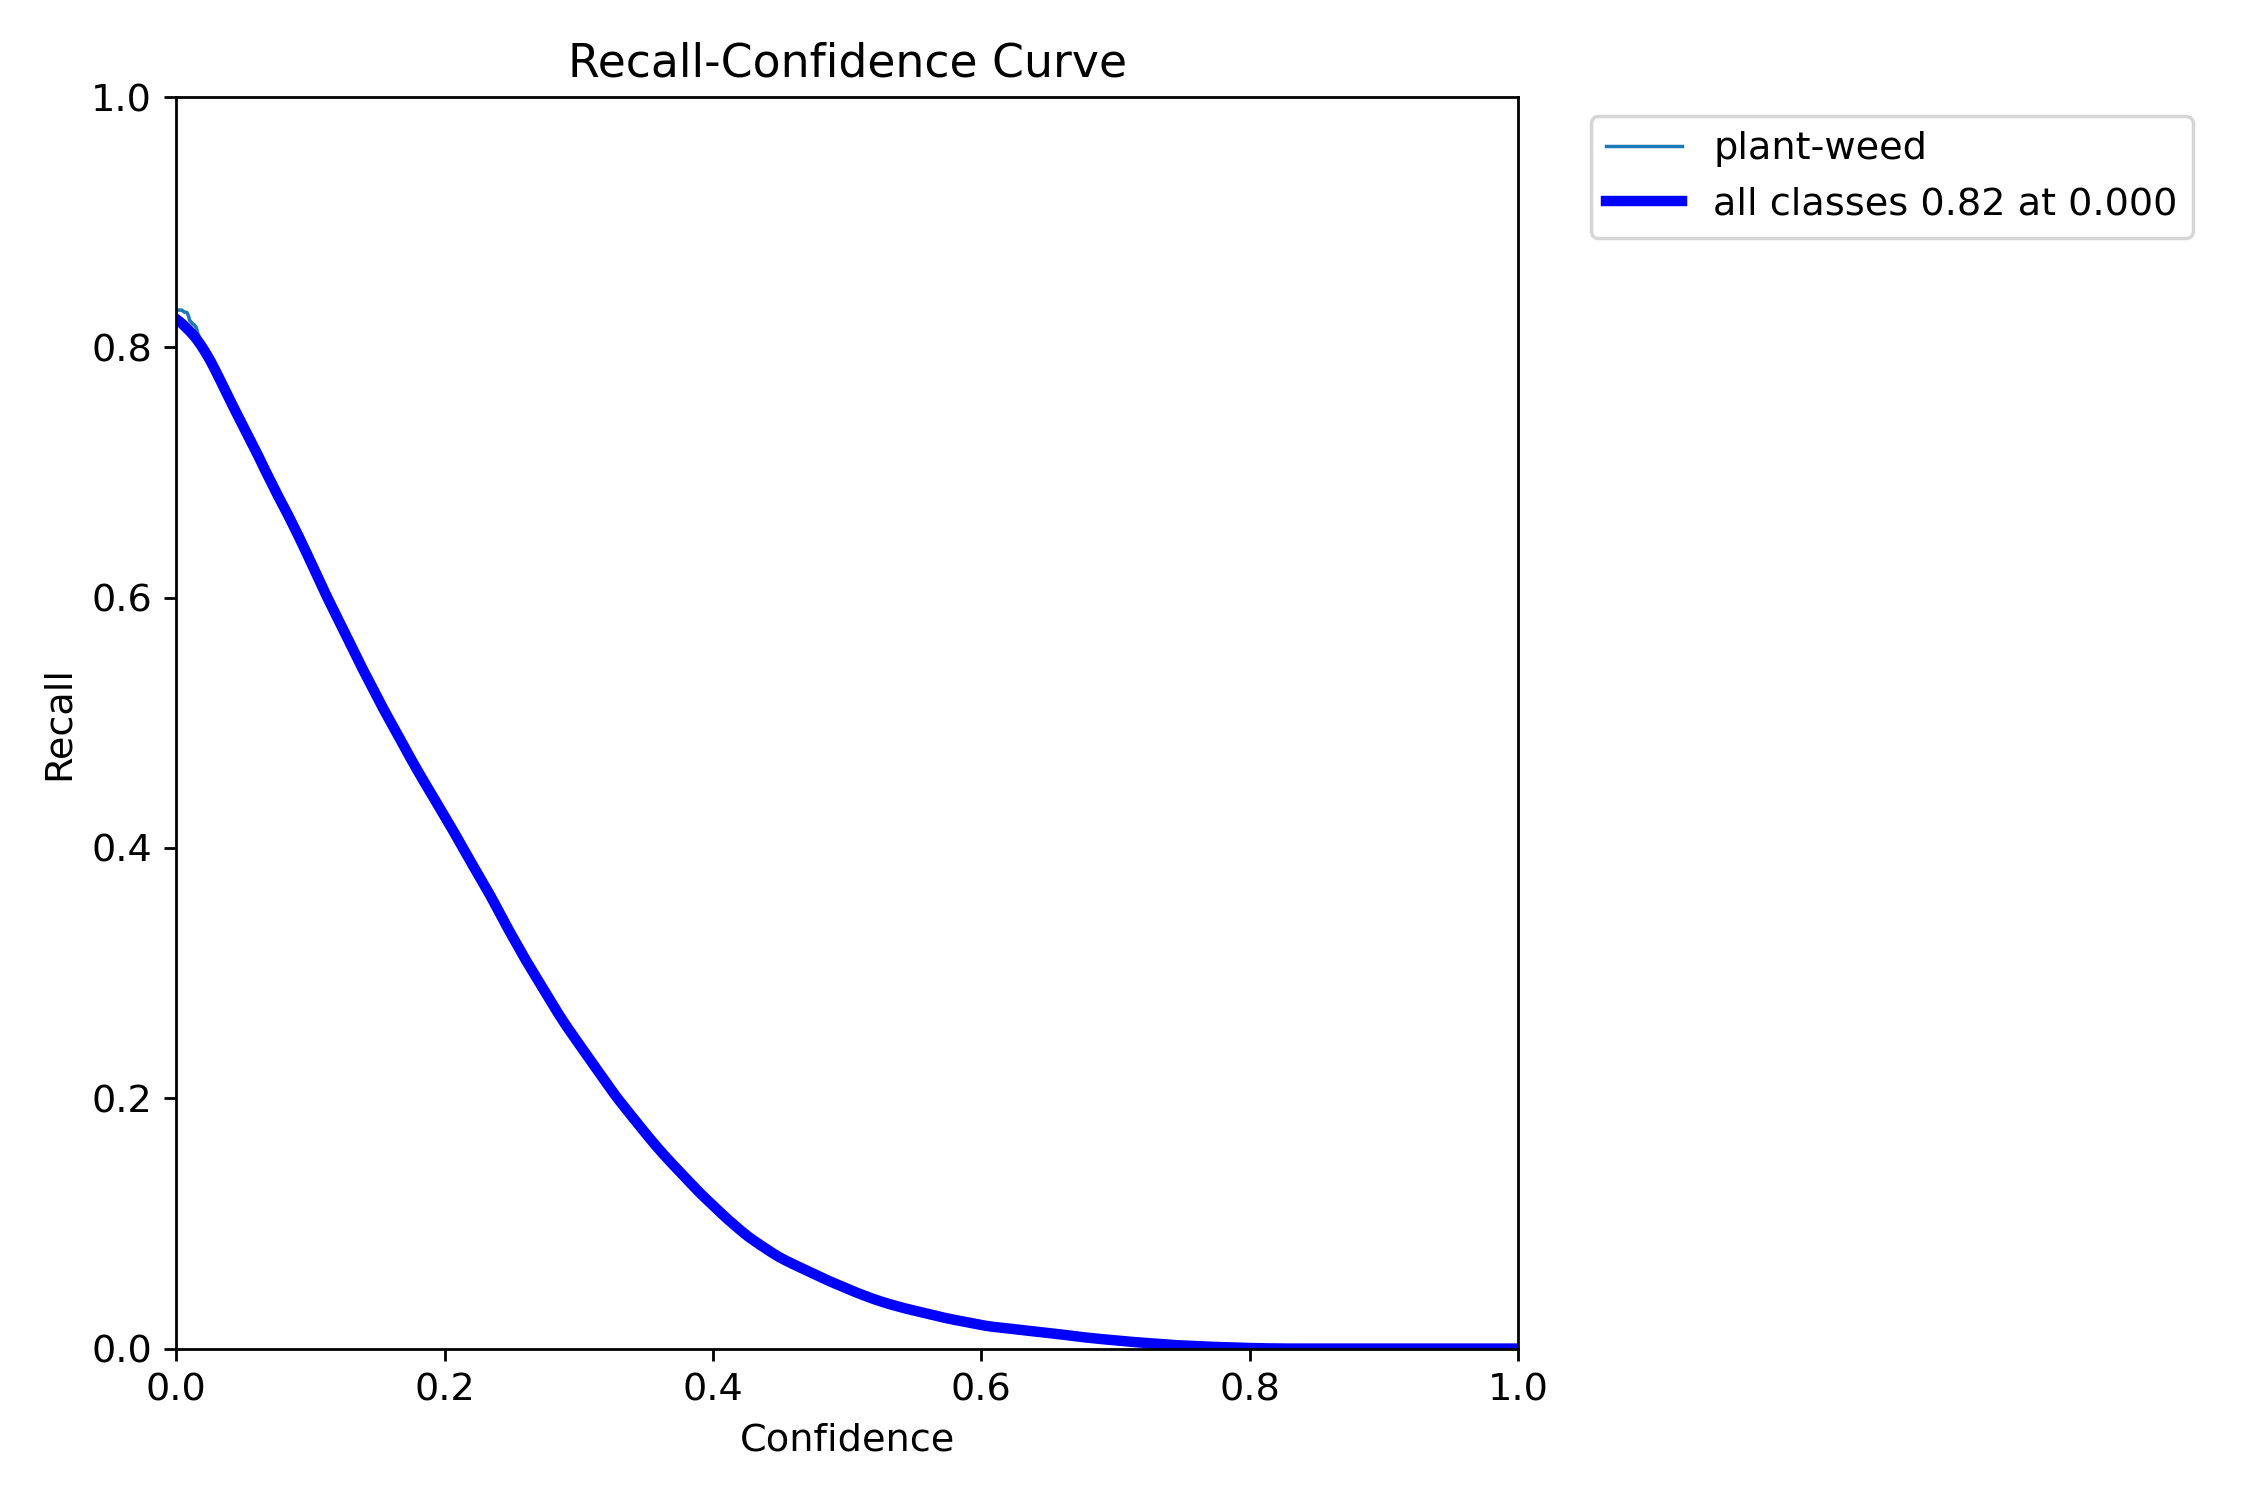

In [17]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

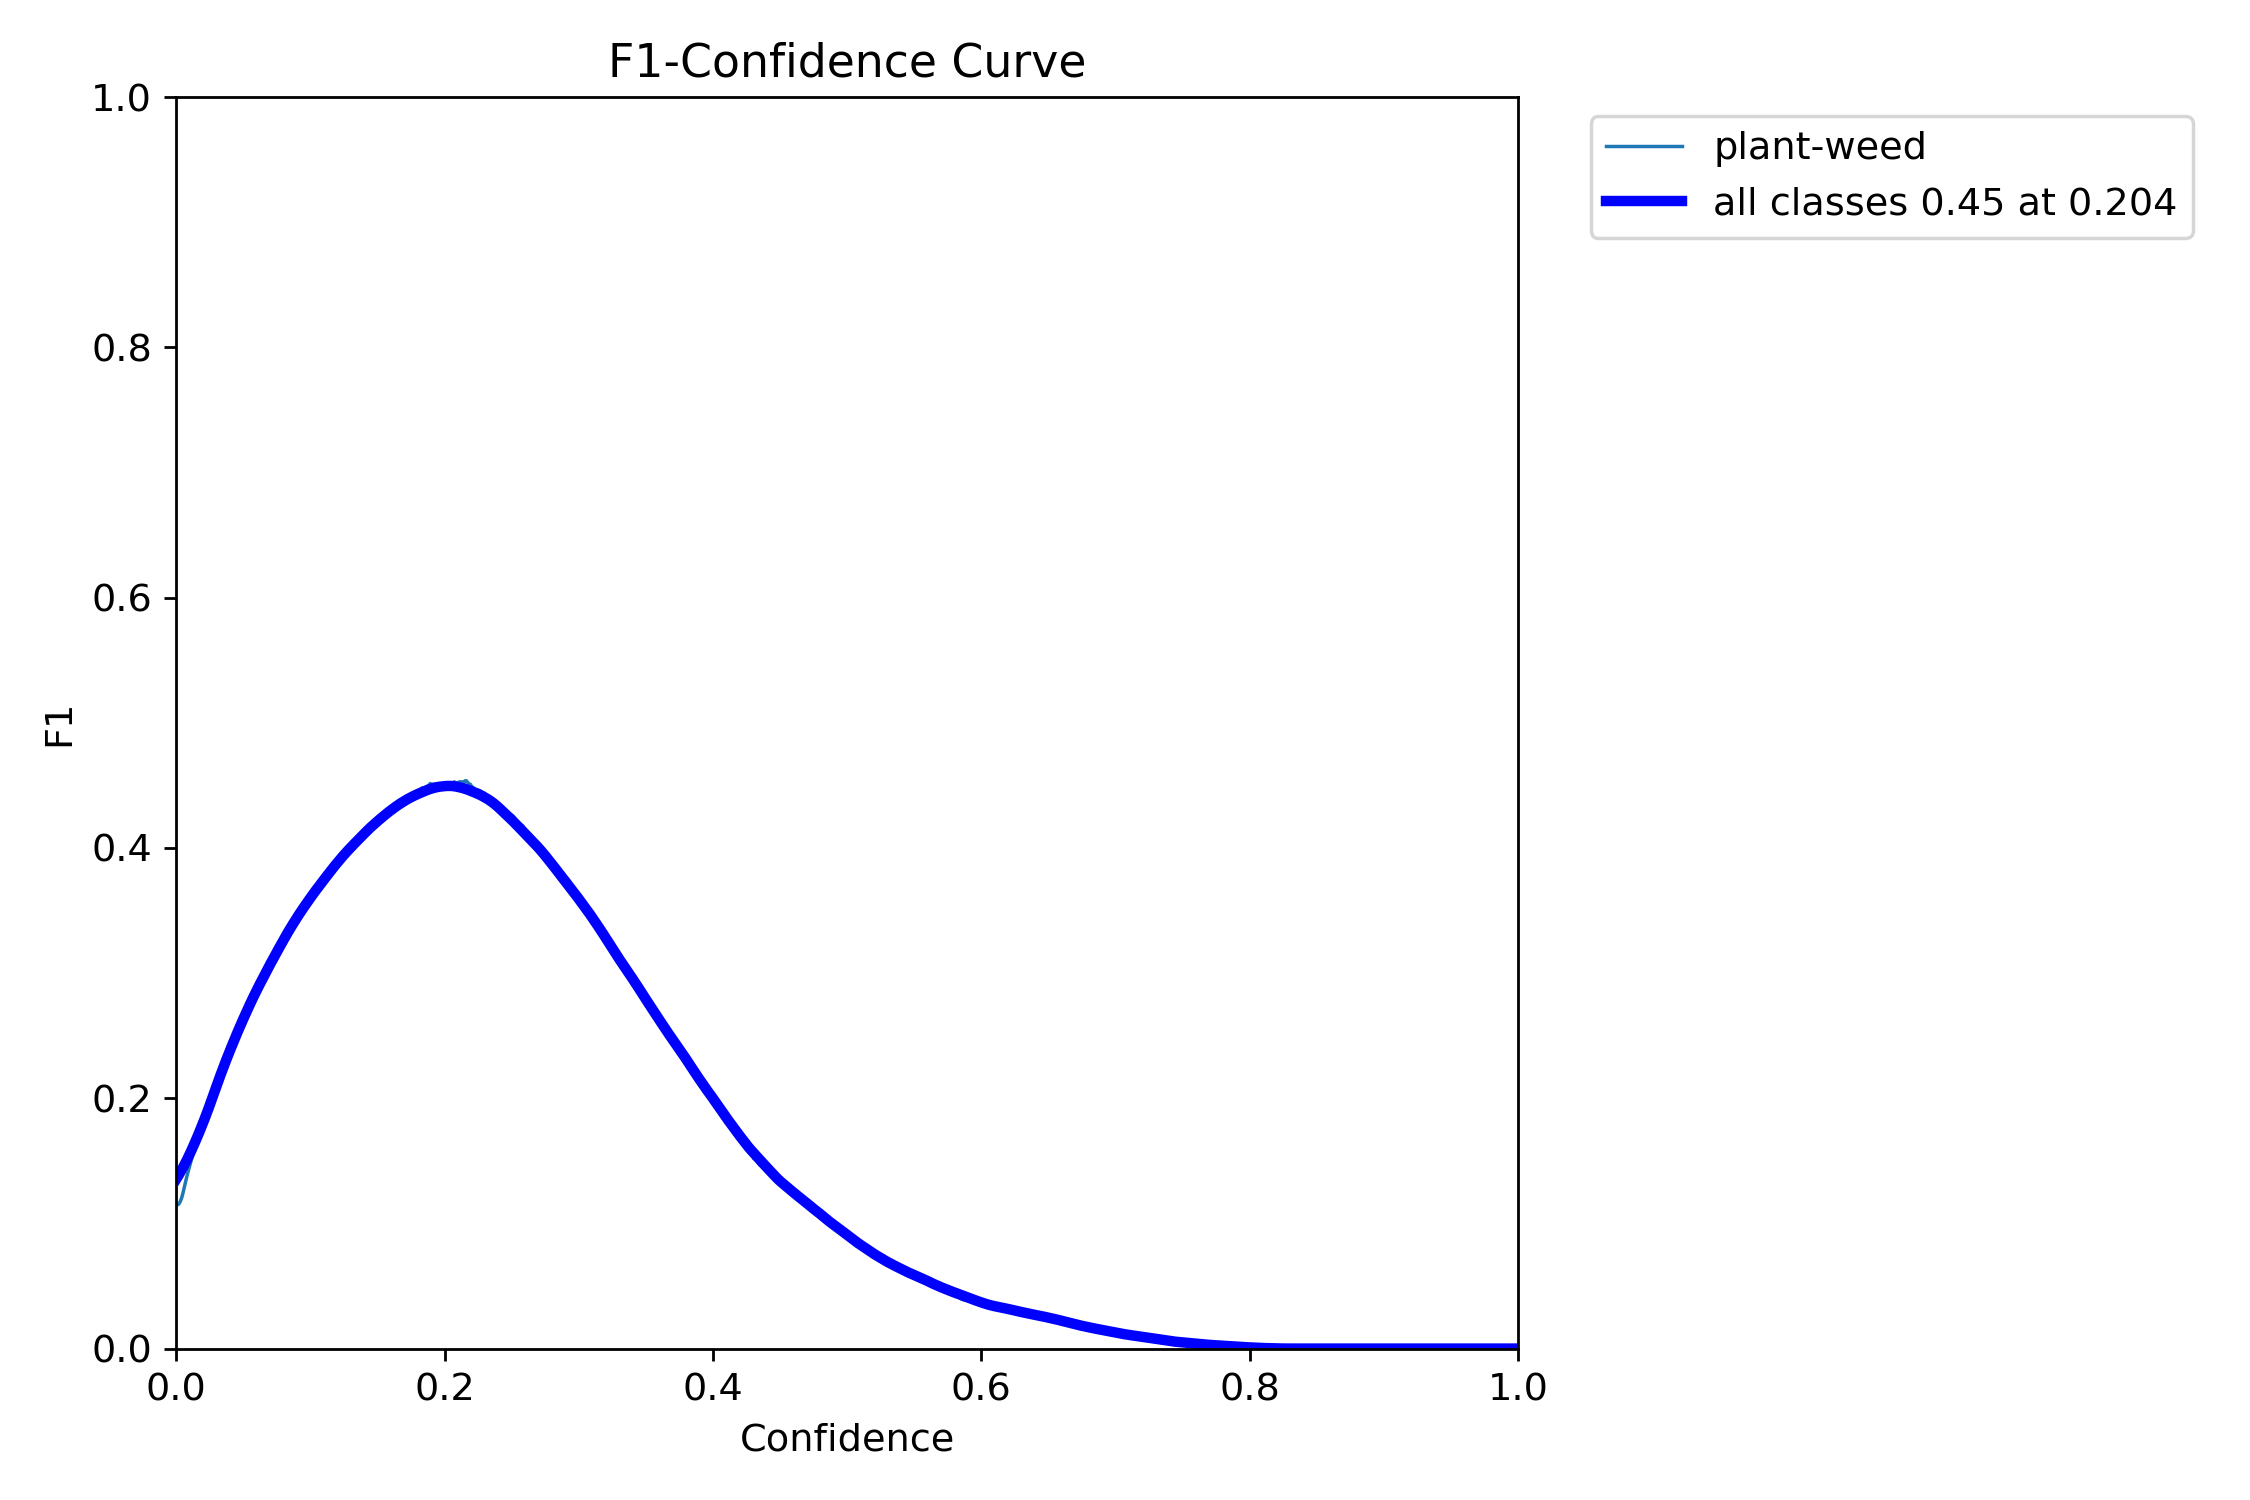

In [18]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- La pérdida de entrenamiento muestra una disminución progresiva en sus tres componentes (box_loss, cls_loss, dfl_loss), lo cual indica que el modelo está aprendiendo correctamente.
- La pérdida de validación sigue una tendencia similar, aunque con valores ligeramente más altos, lo que sugiere que el modelo podría no estar generalizando perfectamente.

2. **Métricas de validación (Precisión, Recall, mAP)**

- La precisión (metrics/precision(B)) y el recall (metrics/recall(B)) aumentan a medida que avanza el entrenamiento, pero los valores absolutos siguen siendo relativamente bajos.
- La métrica mAP50(B) alcanza 0.417, lo que indica que el modelo tiene una precisión media aceptable en la tarea de detección.
- La matriz de confusión muestra un alto número de falsos negativos (53.17%), lo que significa que el modelo está perdiendo muchas detecciones.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- El learning rate aumenta progresivamente en cada época, siguiendo una estrategia de "warm-up" inicial.
- Esto ayuda a estabilizar el entrenamiento en las primeras épocas y podría ser útil para ajustar mejor los pesos del modelo.

----

## Experiment 17
### *Medium | 100 epochs*

In [19]:
folder = "train2/"

In [20]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df2 = pd.read_csv(file_path)
df2.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
95,96,793.514,1.86120,1.33372,1.39437,0.53484,0.48070,0.47591,0.16799,2.33593,1.37387,1.44444,0.000119,0.000119,0.000119
96,97,801.257,1.86952,1.30212,1.38471,0.53687,0.48526,0.47710,0.16822,2.34362,1.37286,1.44701,0.000099,0.000099,0.000099
97,98,809.308,1.84764,1.29247,1.38353,0.53390,0.48119,0.47427,0.16677,2.34928,1.36764,1.45181,0.000079,0.000079,0.000079
98,99,816.362,1.81450,1.27137,1.36590,0.53178,0.48513,0.47505,0.16715,2.34858,1.36566,1.44997,0.000060,0.000060,0.000060
99,100,823.843,1.85998,1.29719,1.37528,0.53602,0.48443,0.47646,0.16859,2.34628,1.36380,1.44931,0.000040,0.000040,0.000040


In [21]:
last_row = df2.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 13.731 min


### Graphs

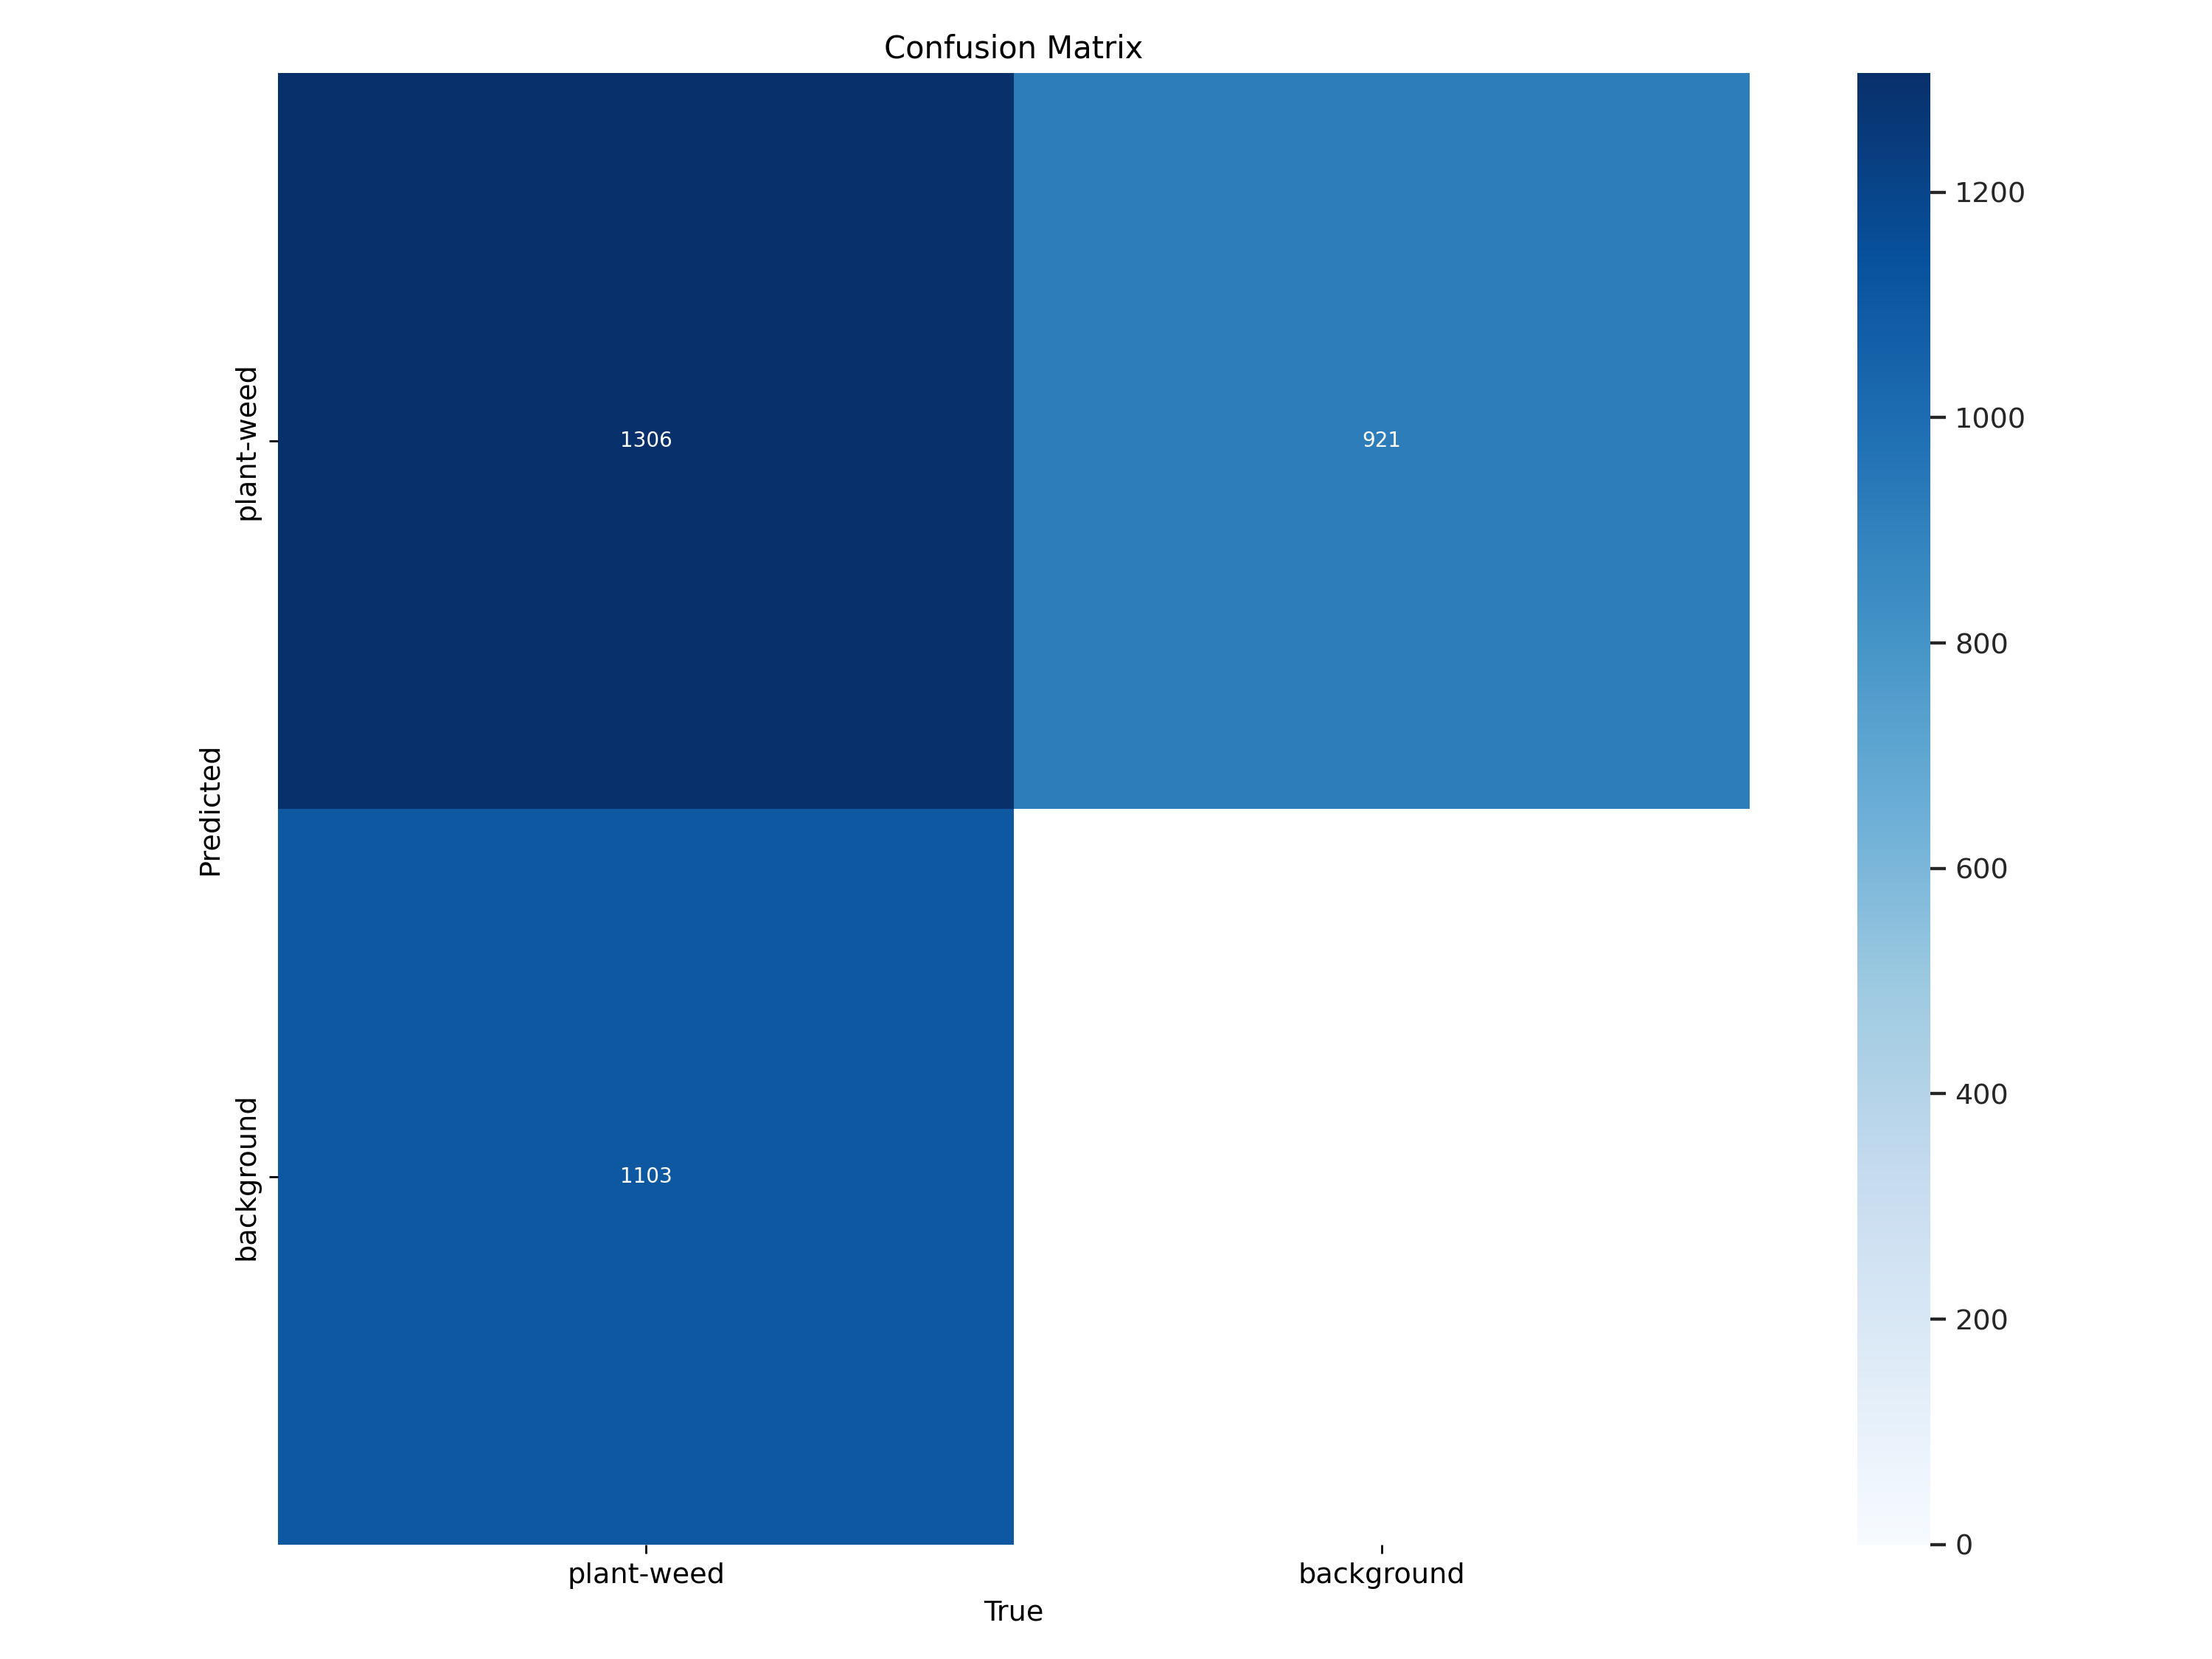

In [22]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

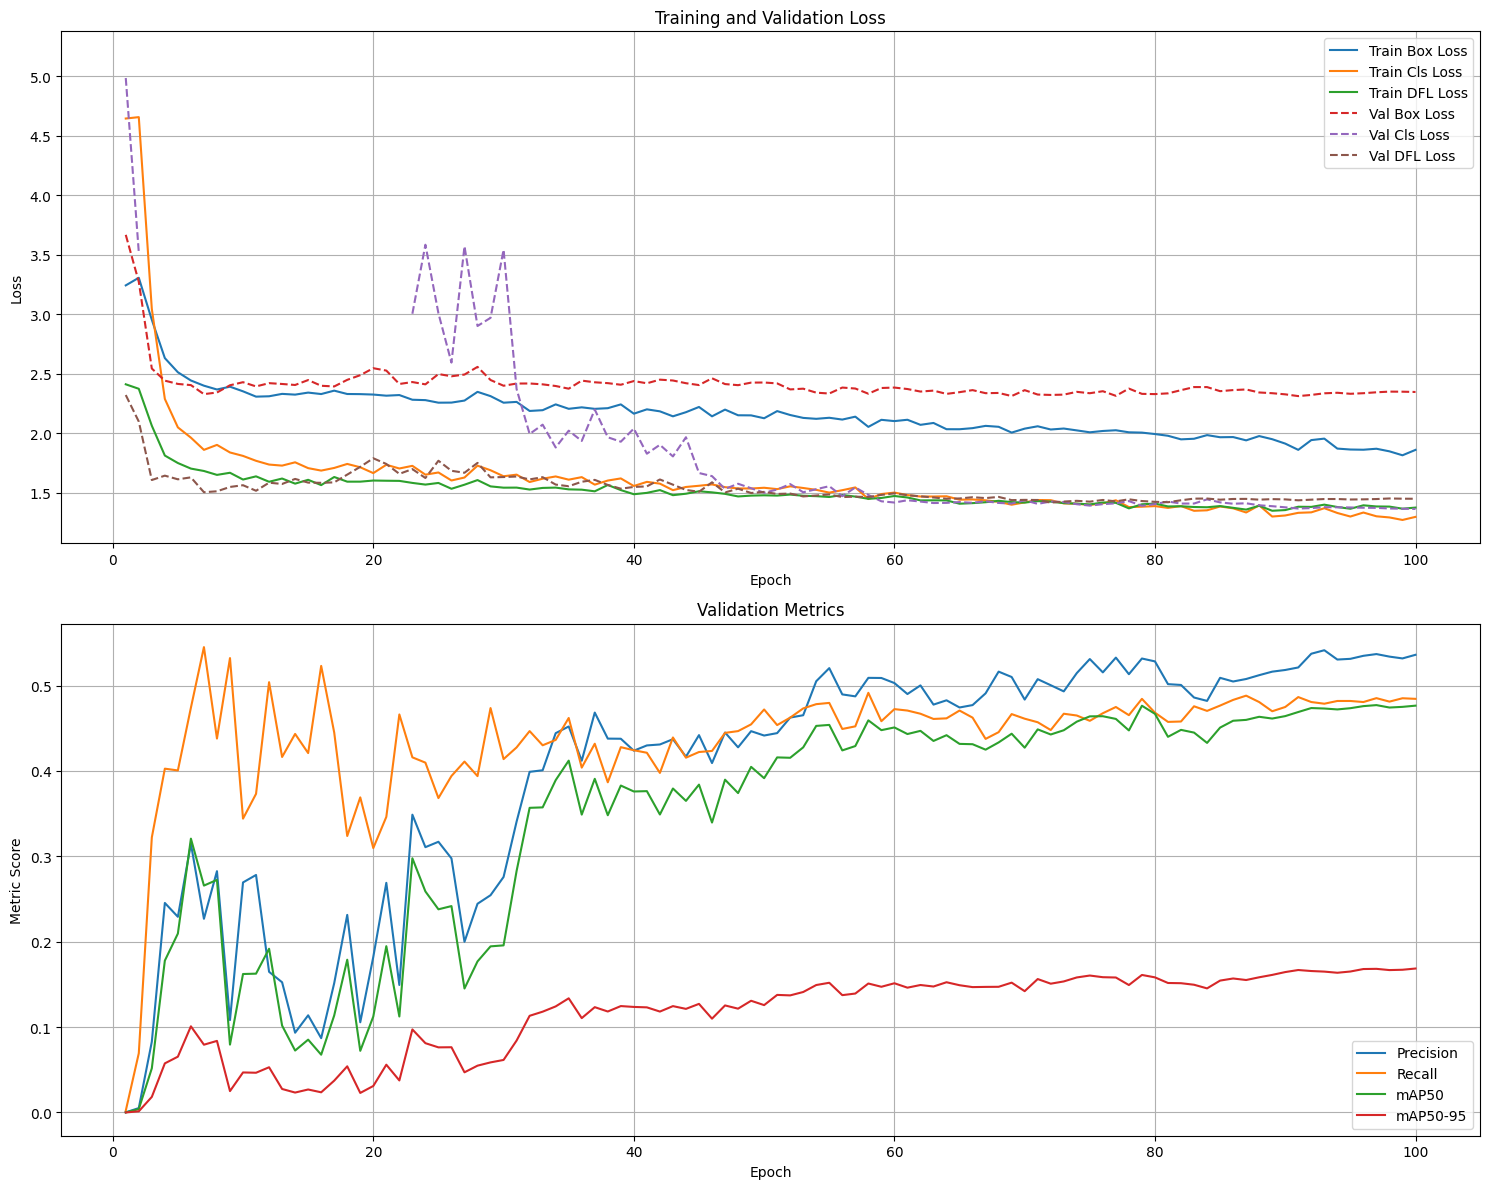

In [23]:
graph_training_metrics(df2, graph="full")

In [24]:
graph_LrLoss_3D(df2)

Validation set


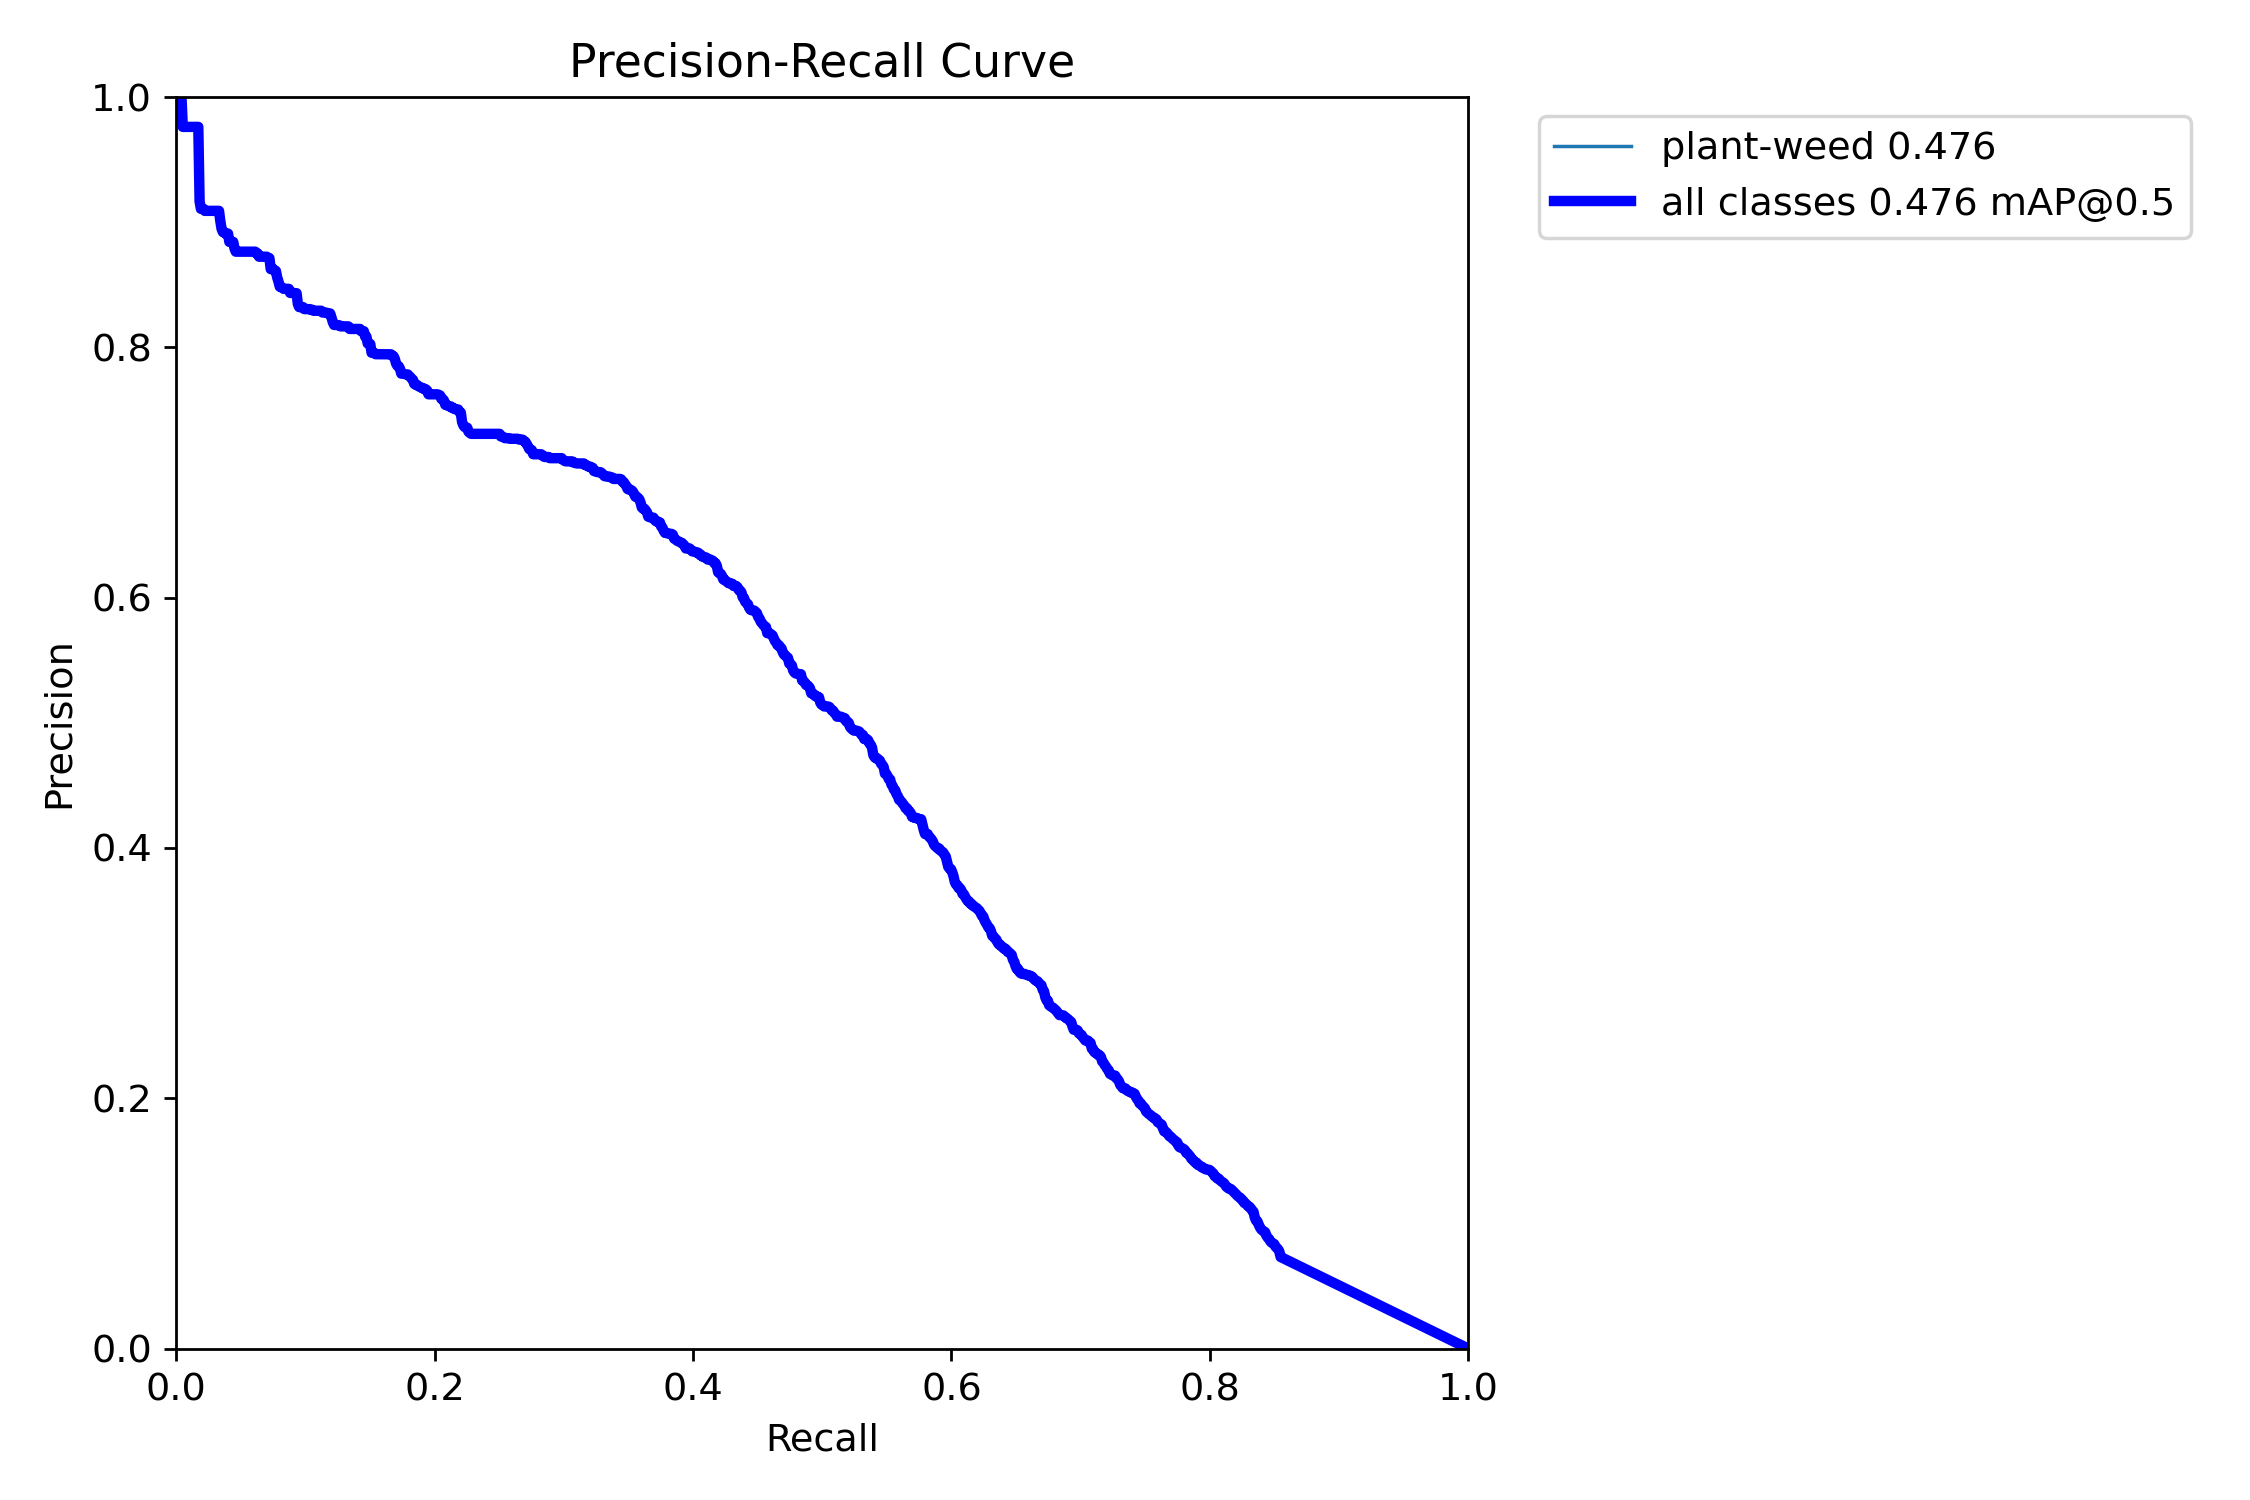

In [25]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

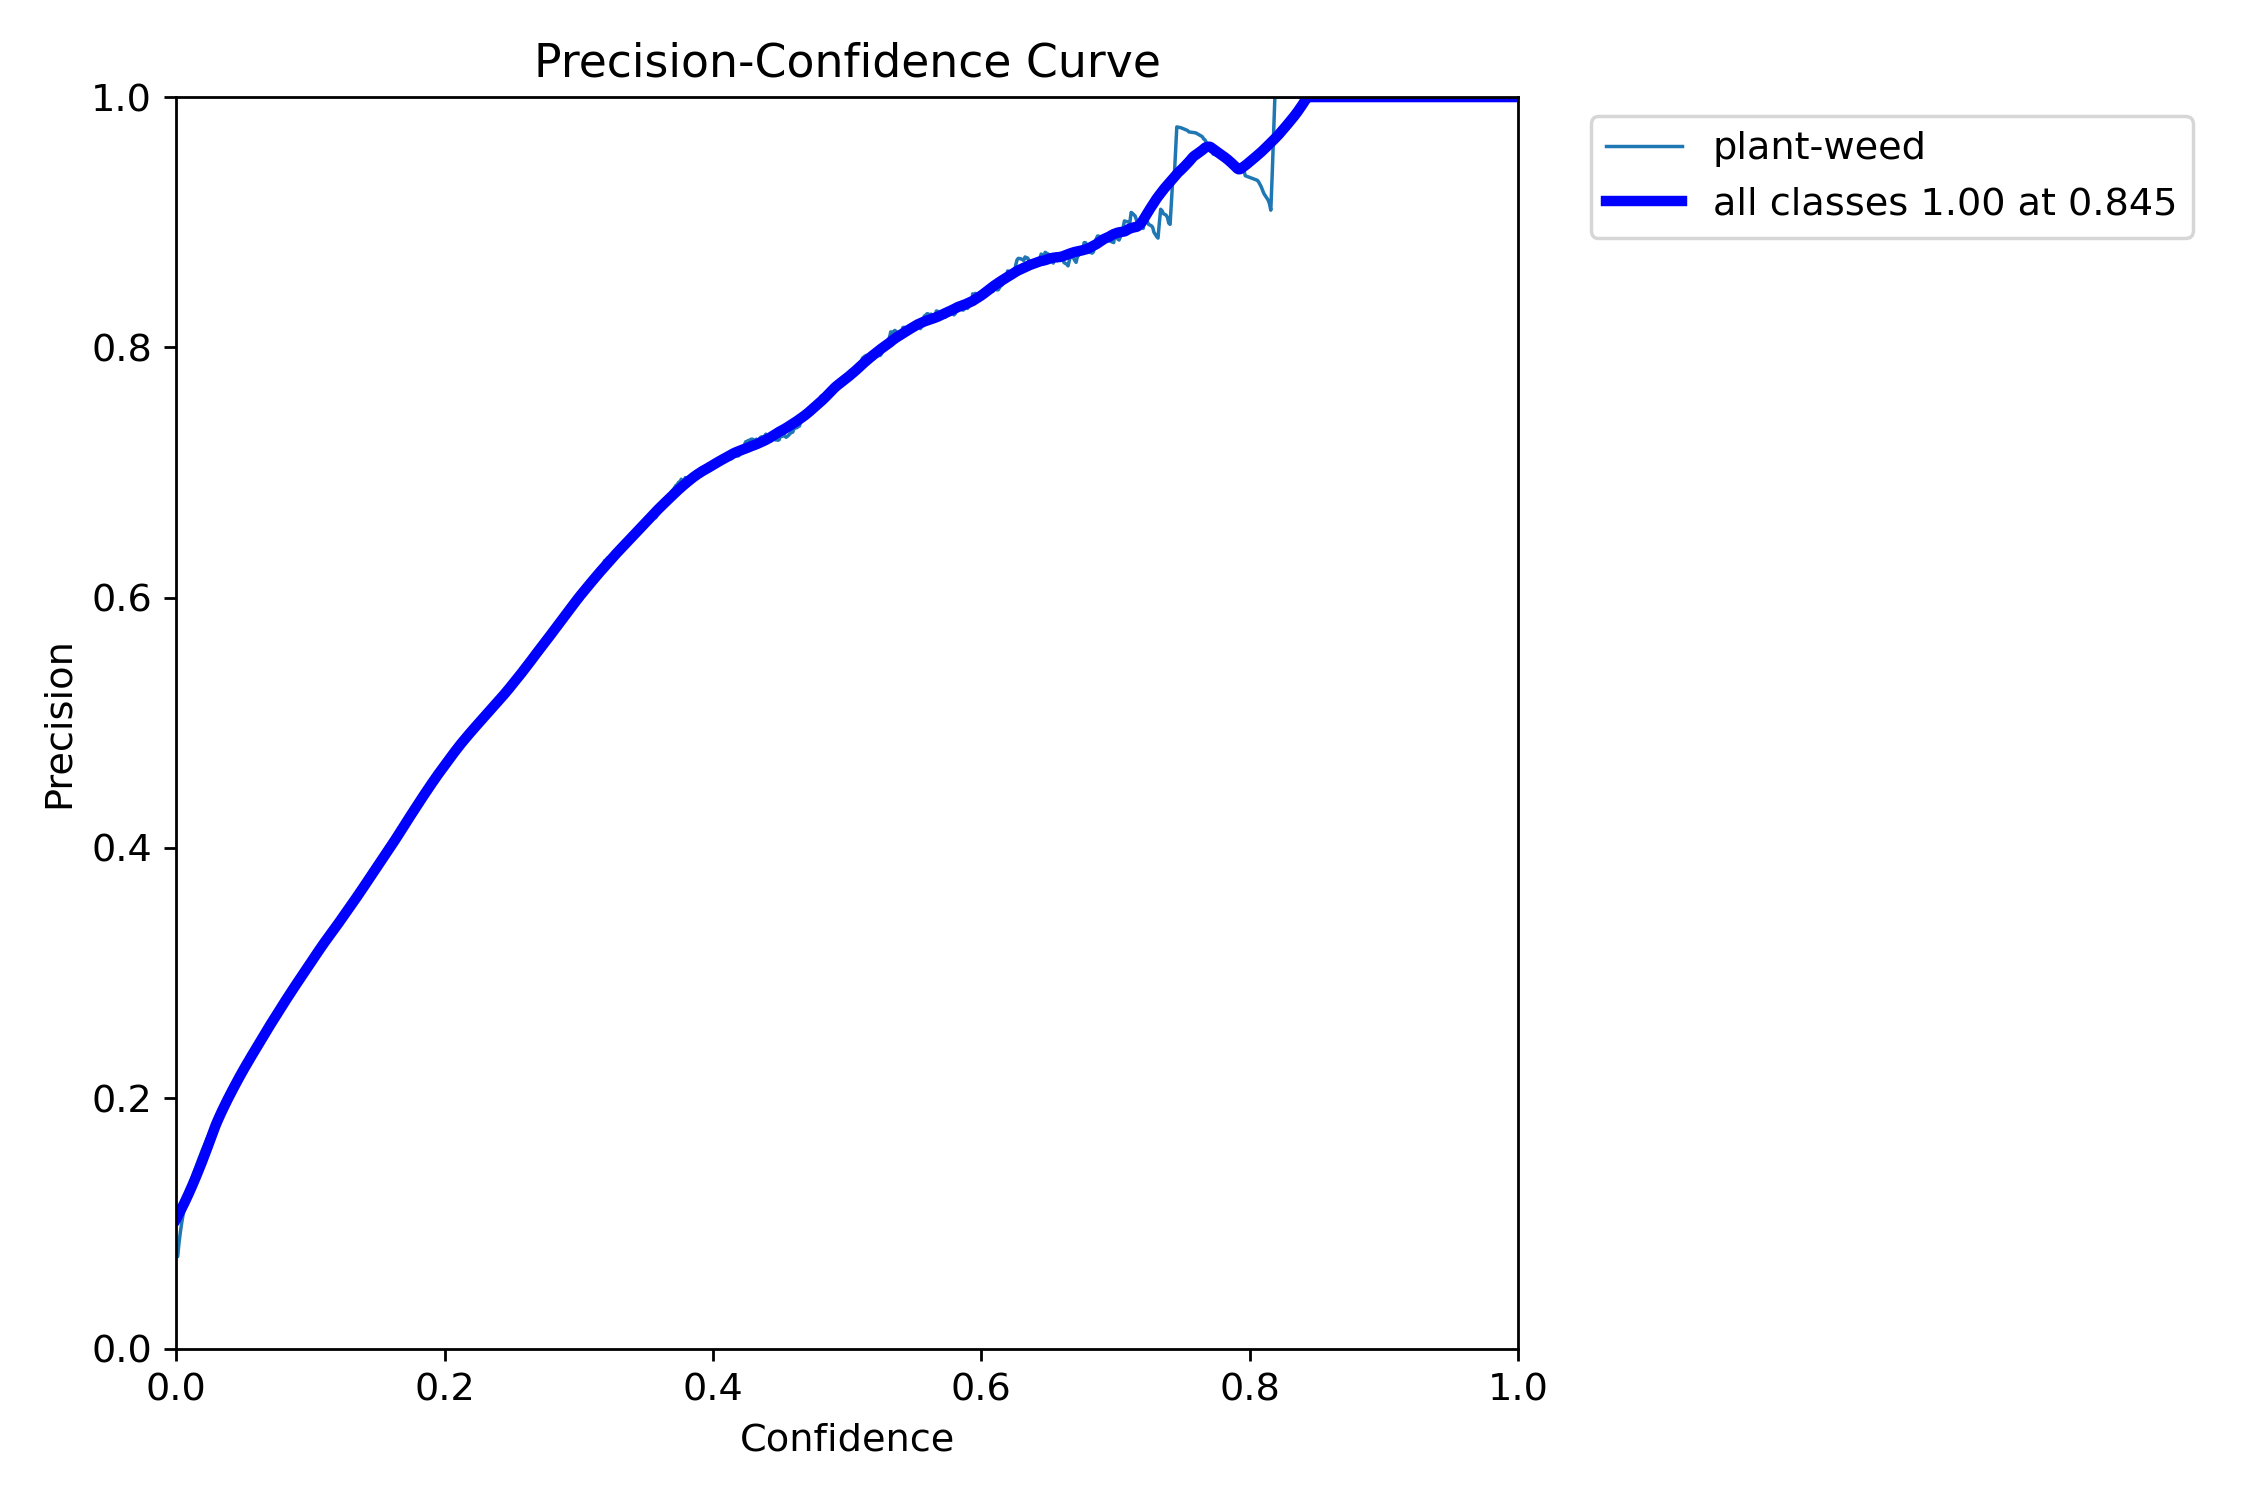

In [26]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

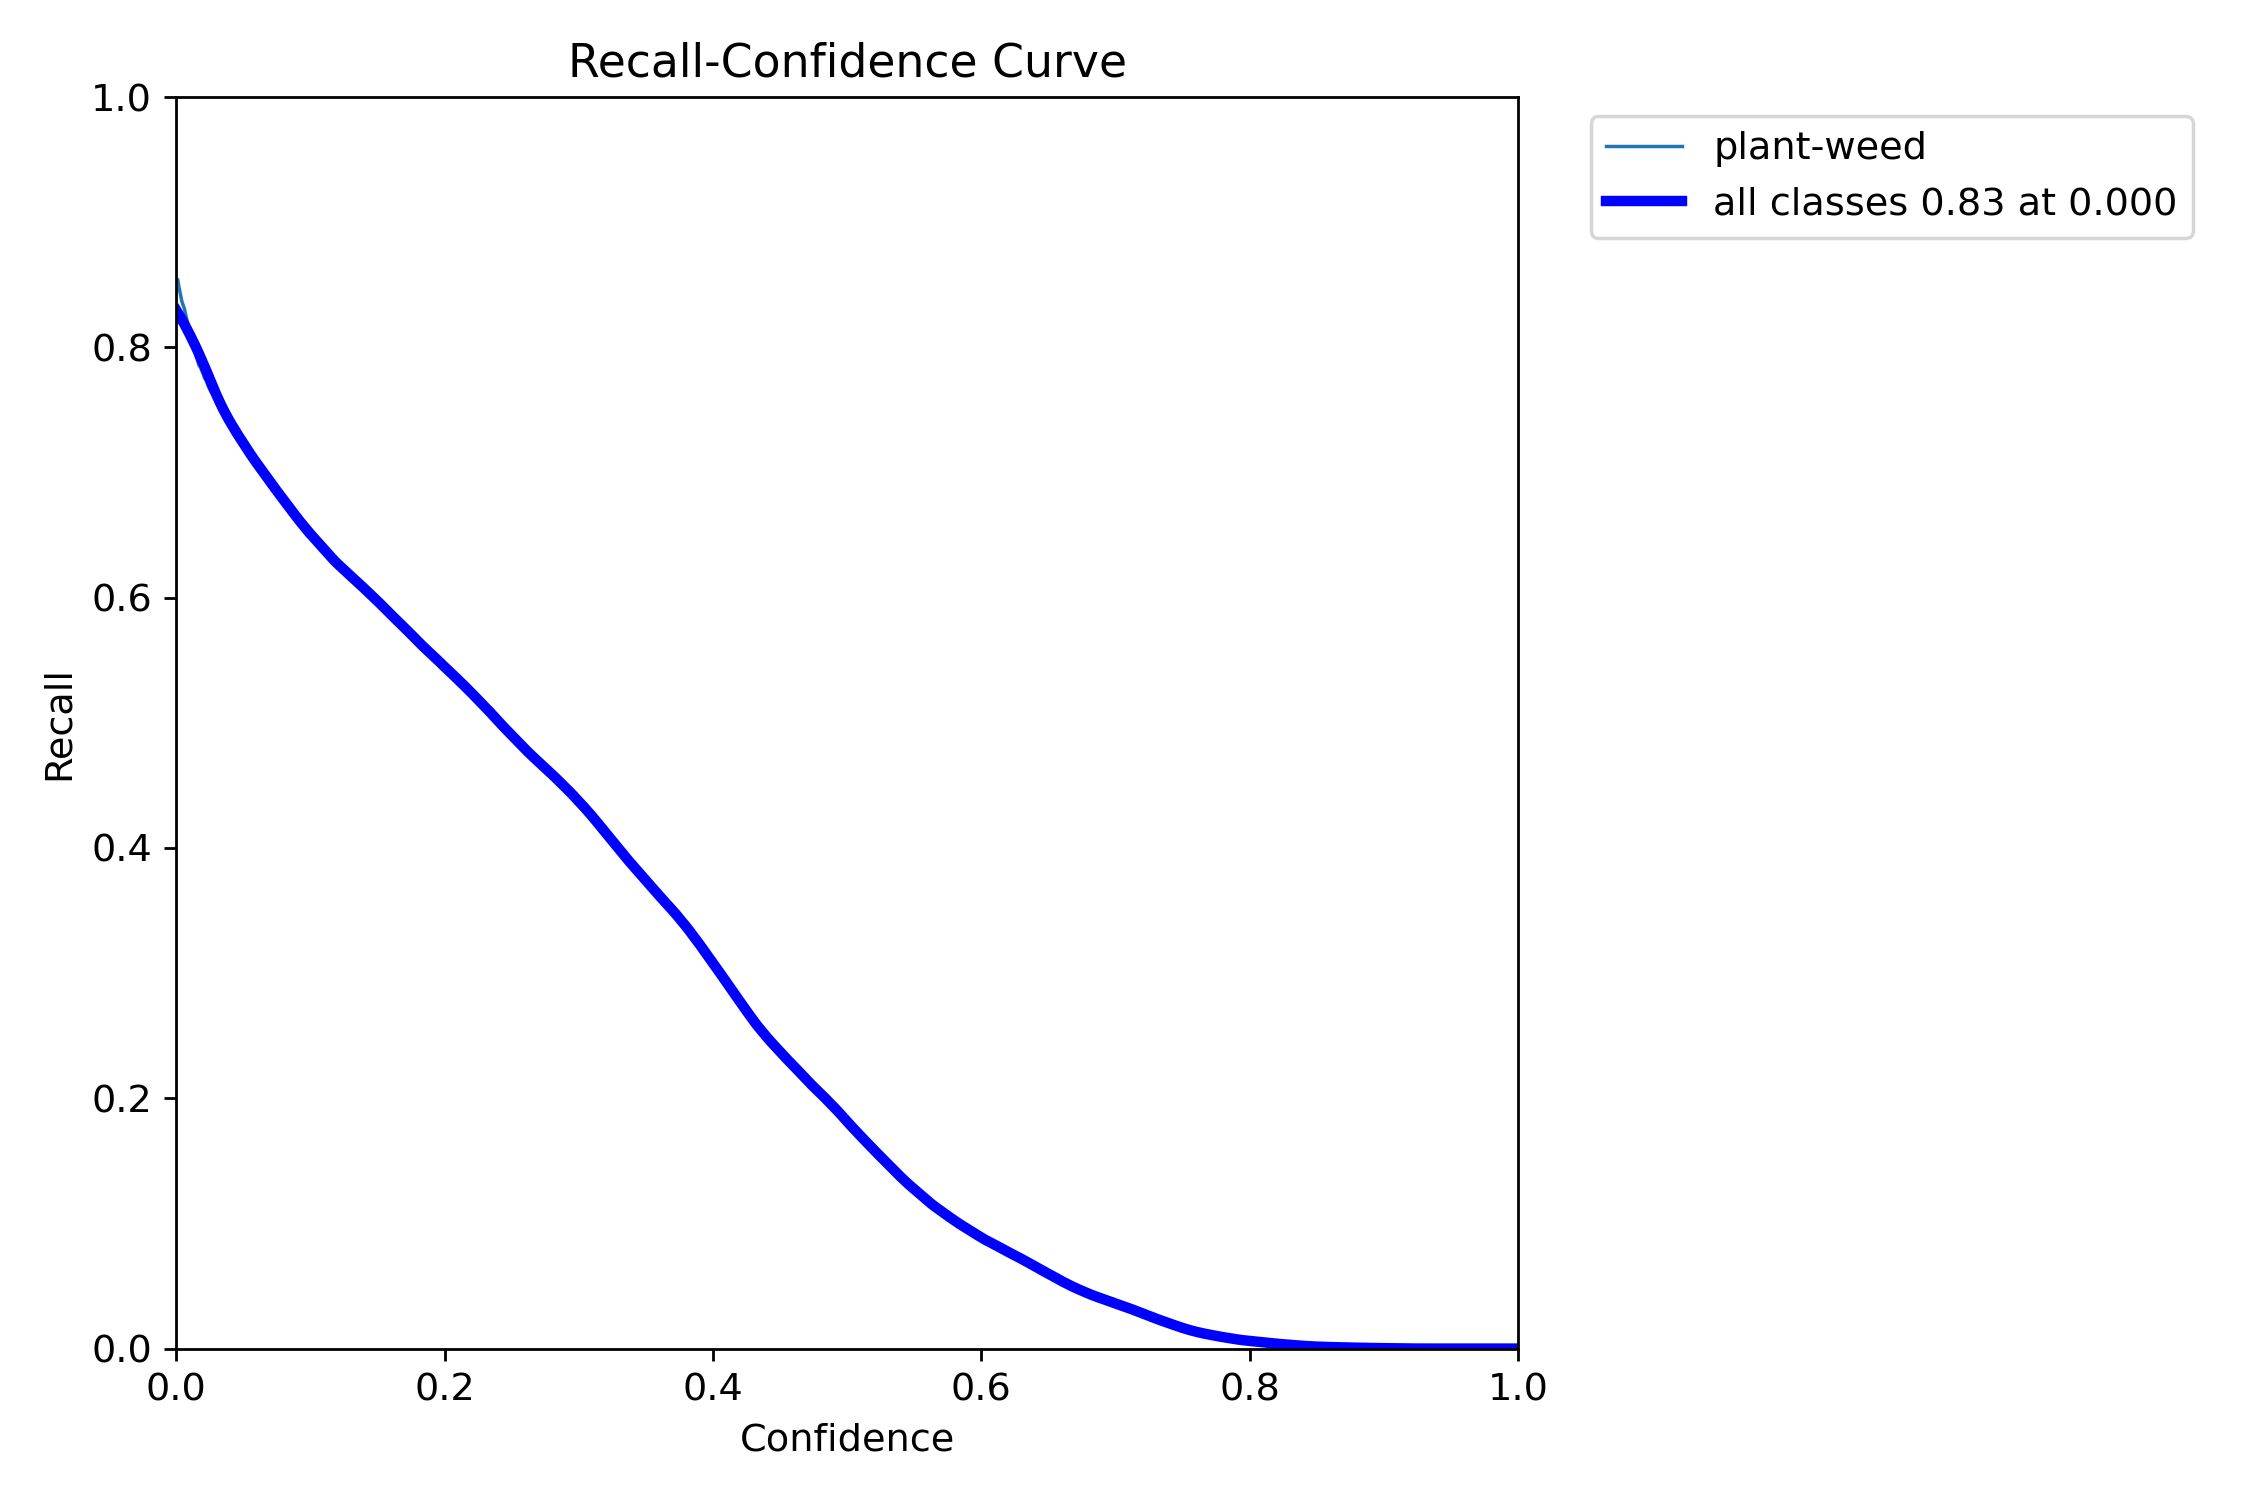

In [27]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

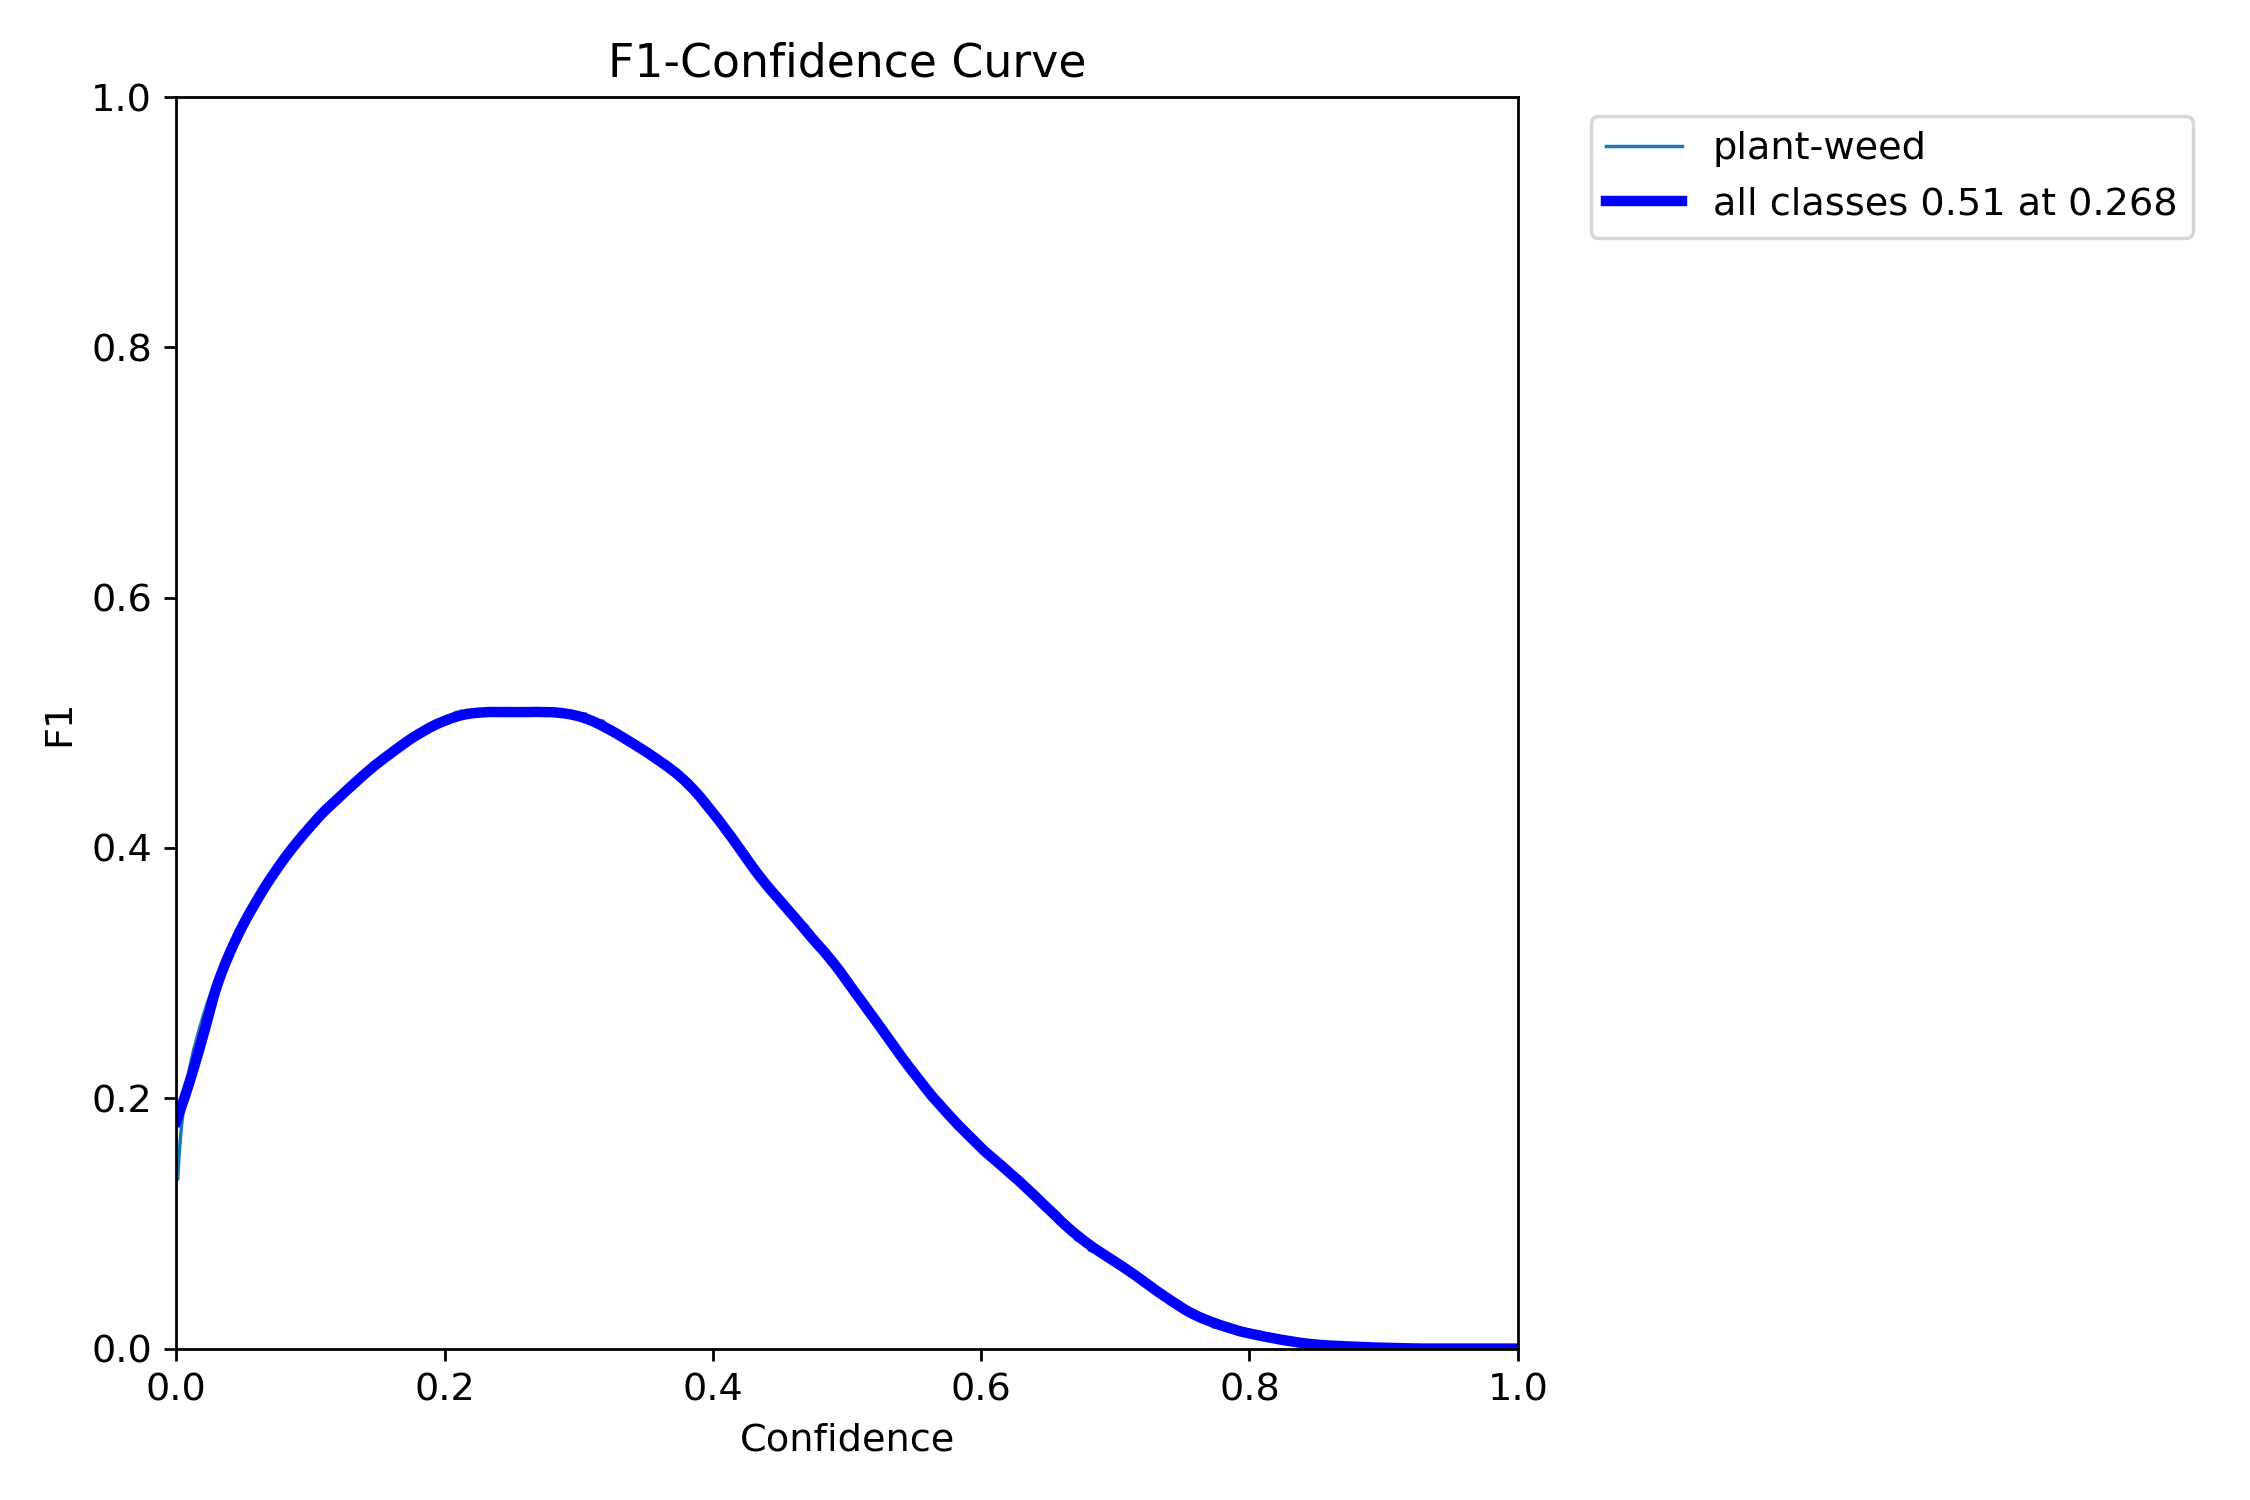

In [28]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- La pérdida de entrenamiento (train/box_loss, train/cls_loss, train/dfl_loss) todavía muestra una tendencia decreciente, lo que indica que el modelo está aprendiendo.
- La pérdida de validación (val/box_loss, val/cls_loss, val/dfl_loss) permanece relativamente alta, pero ya no vemos valores inf, lo que significa que los problemas de estabilidad podrían haber mejorado.
- Dado que las pérdidas están disminuyendo pero la pérdida de validación sigue siendo significativa, podría estar ocurriendo cierto grado de sobreajuste.

2. **Métricas de validación (Precisión, Recall, mAP)**

- El mAP a 0.5 ha mejorado a 0.476, lo cual es mejor que antes (0.417), indicando que el modelo ahora es más efectivo para hacer predicciones correctas.
- Mayores verdaderos positivos (48.37%) y menores falsos negativos (40.85%) sugieren que el modelo está detectando más instancias relevantes pero todavía perdiendo una cantidad considerable.
- Los falsos positivos han disminuido a 10.78%, lo que significa que el modelo está haciendo menos detecciones incorrectas, lo cual es una buena señal.
- La puntuación F1 aumentó a 0.51, lo que significa que el equilibrio del modelo entre precisión y exhaustividad ha mejorado.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- El learning rate aumentó progresivamente, lo que se alinea con una fase de warm-up adecuada.
- Si la estabilización de la pérdida sigue siendo una preocupación, una tasa de aprendizaje más baja o adaptive scheduling (ej. _ReduceLROnPlateau_) podría ayudar a mejorar la generalización.

----

## Experiment 18
### *Nano | ~1000 epochs*

In [29]:
folder = "train3/"

In [30]:
# Ruta del archivo
file_path =  os.path.join(folder, "results.csv")

# Cargar el archivo en un DataFrame y mostrar las primeras filas
df3 = pd.read_csv(file_path)
df3.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
221,222,1125.40,2.23649,1.61928,1.43502,0.44652,0.45039,0.39101,0.13160,2.36011,1.60253,1.40044,0.001562,0.001562,0.001562
222,223,1130.21,2.20629,1.62344,1.43156,0.44899,0.43794,0.39164,0.13329,2.37179,1.56748,1.40307,0.001560,0.001560,0.001560
223,224,1134.57,2.19571,1.58471,1.42590,0.44364,0.44454,0.40572,0.13581,2.39011,1.53731,1.40564,0.001558,0.001558,0.001558
224,225,1139.91,2.20646,1.58879,1.43160,0.45728,0.43545,0.39782,0.13389,2.38029,1.57173,1.41324,0.001556,0.001556,0.001556
225,226,1144.57,2.19576,1.57899,1.41865,0.43754,0.45621,0.39654,0.13281,2.36951,1.58863,1.41229,0.001554,0.001554,0.001554


In [31]:
last_row = df3.iloc[-1]
time = last_row['time']/60
print(f"Training time: {time:.3f} min")

Training time: 19.076 min


### Graphs

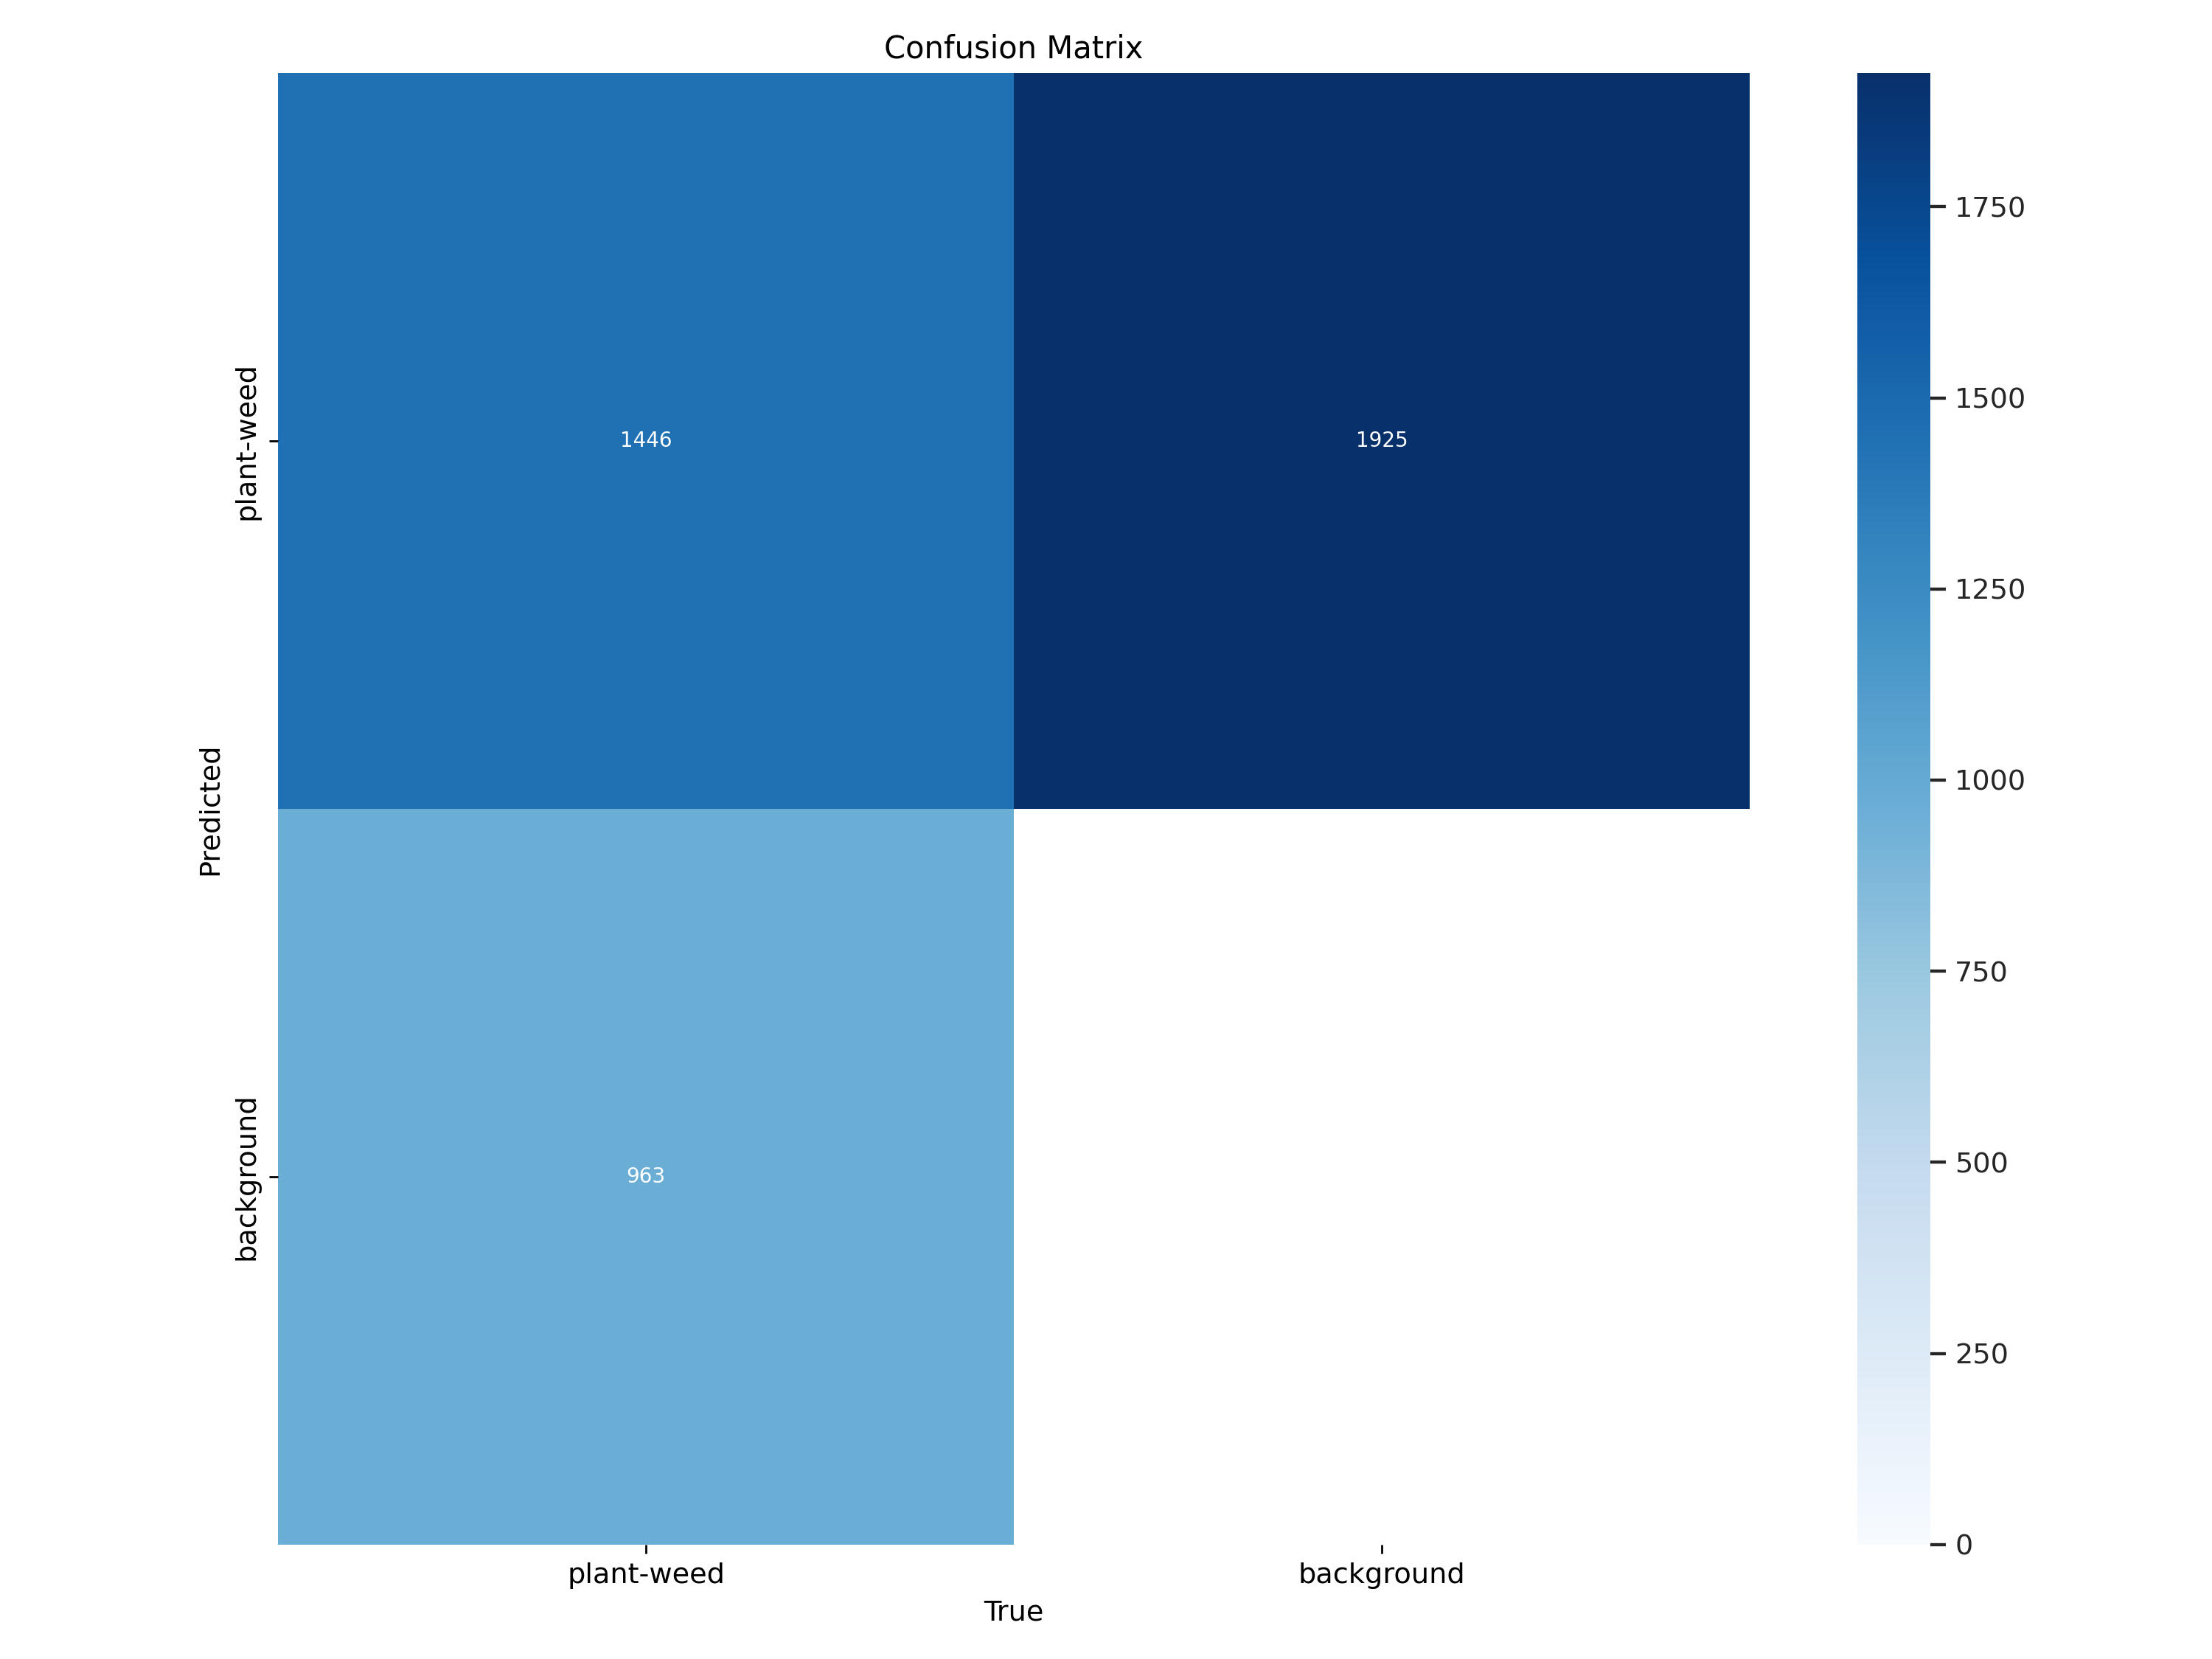

In [32]:
file_name = os.path.join(folder, "confusion_matrix.png")
Image(file_name, width=1000)

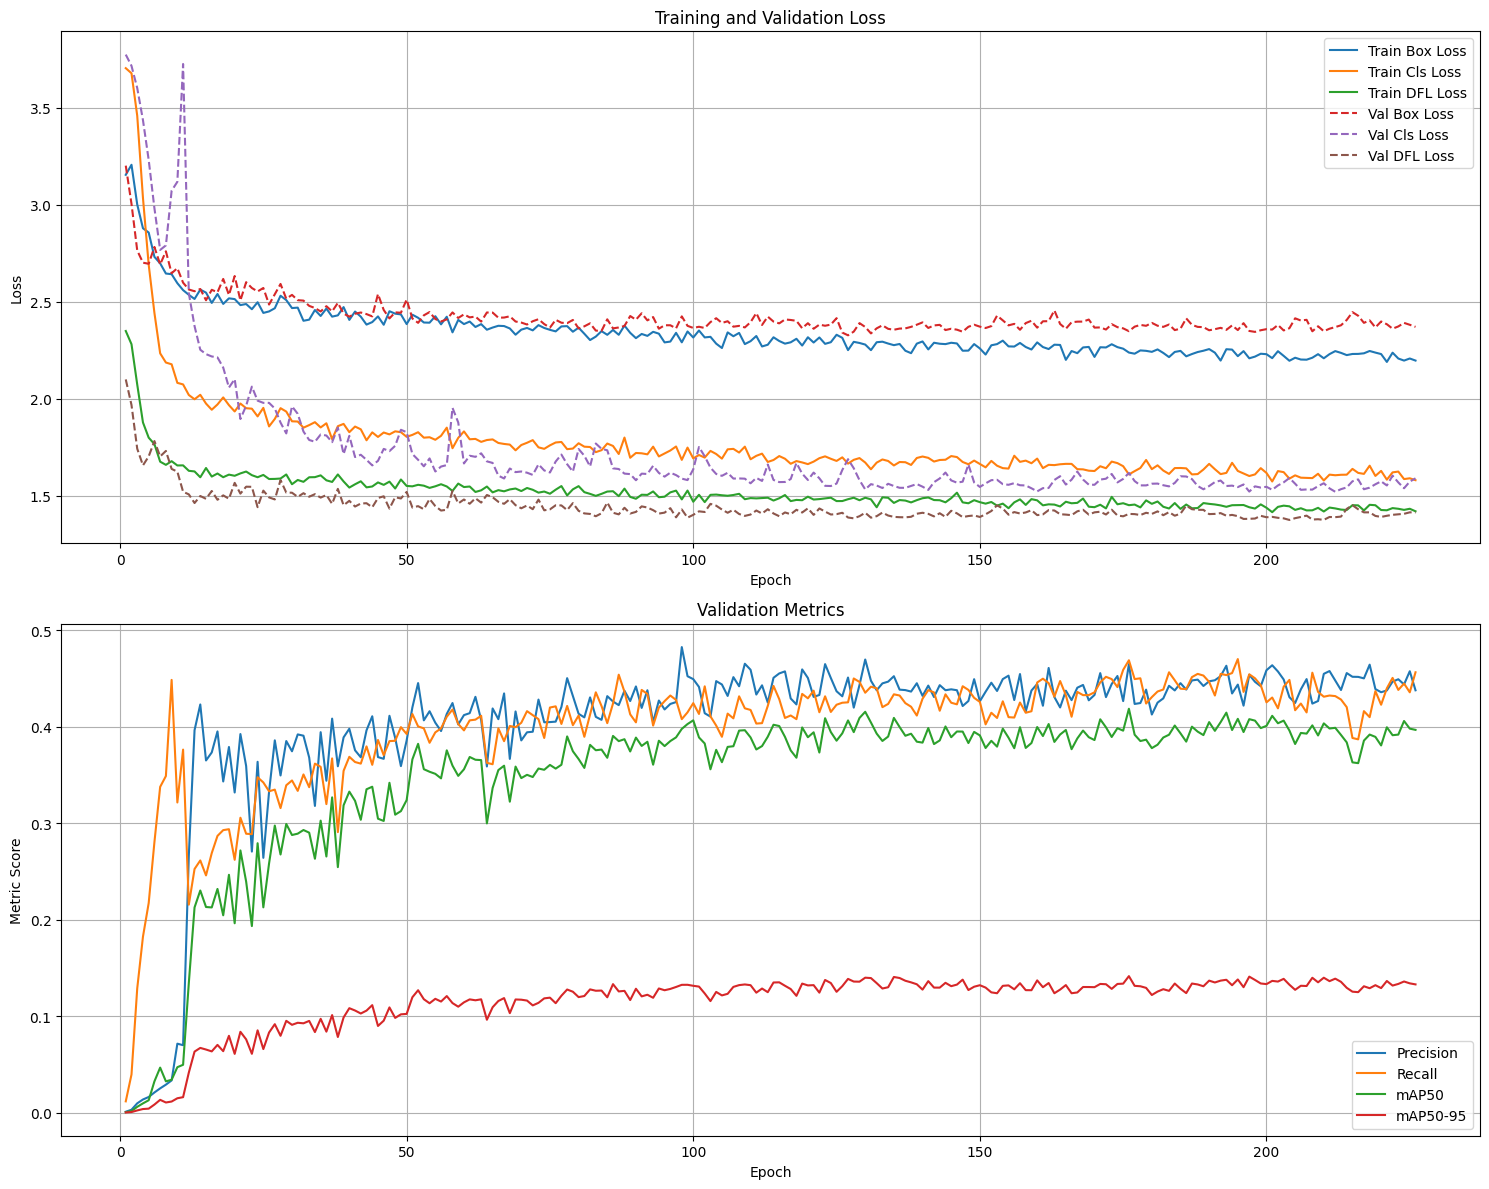

In [33]:
graph_training_metrics(df3, graph="full")

In [34]:
graph_LrLoss_3D(df3)

Validation set


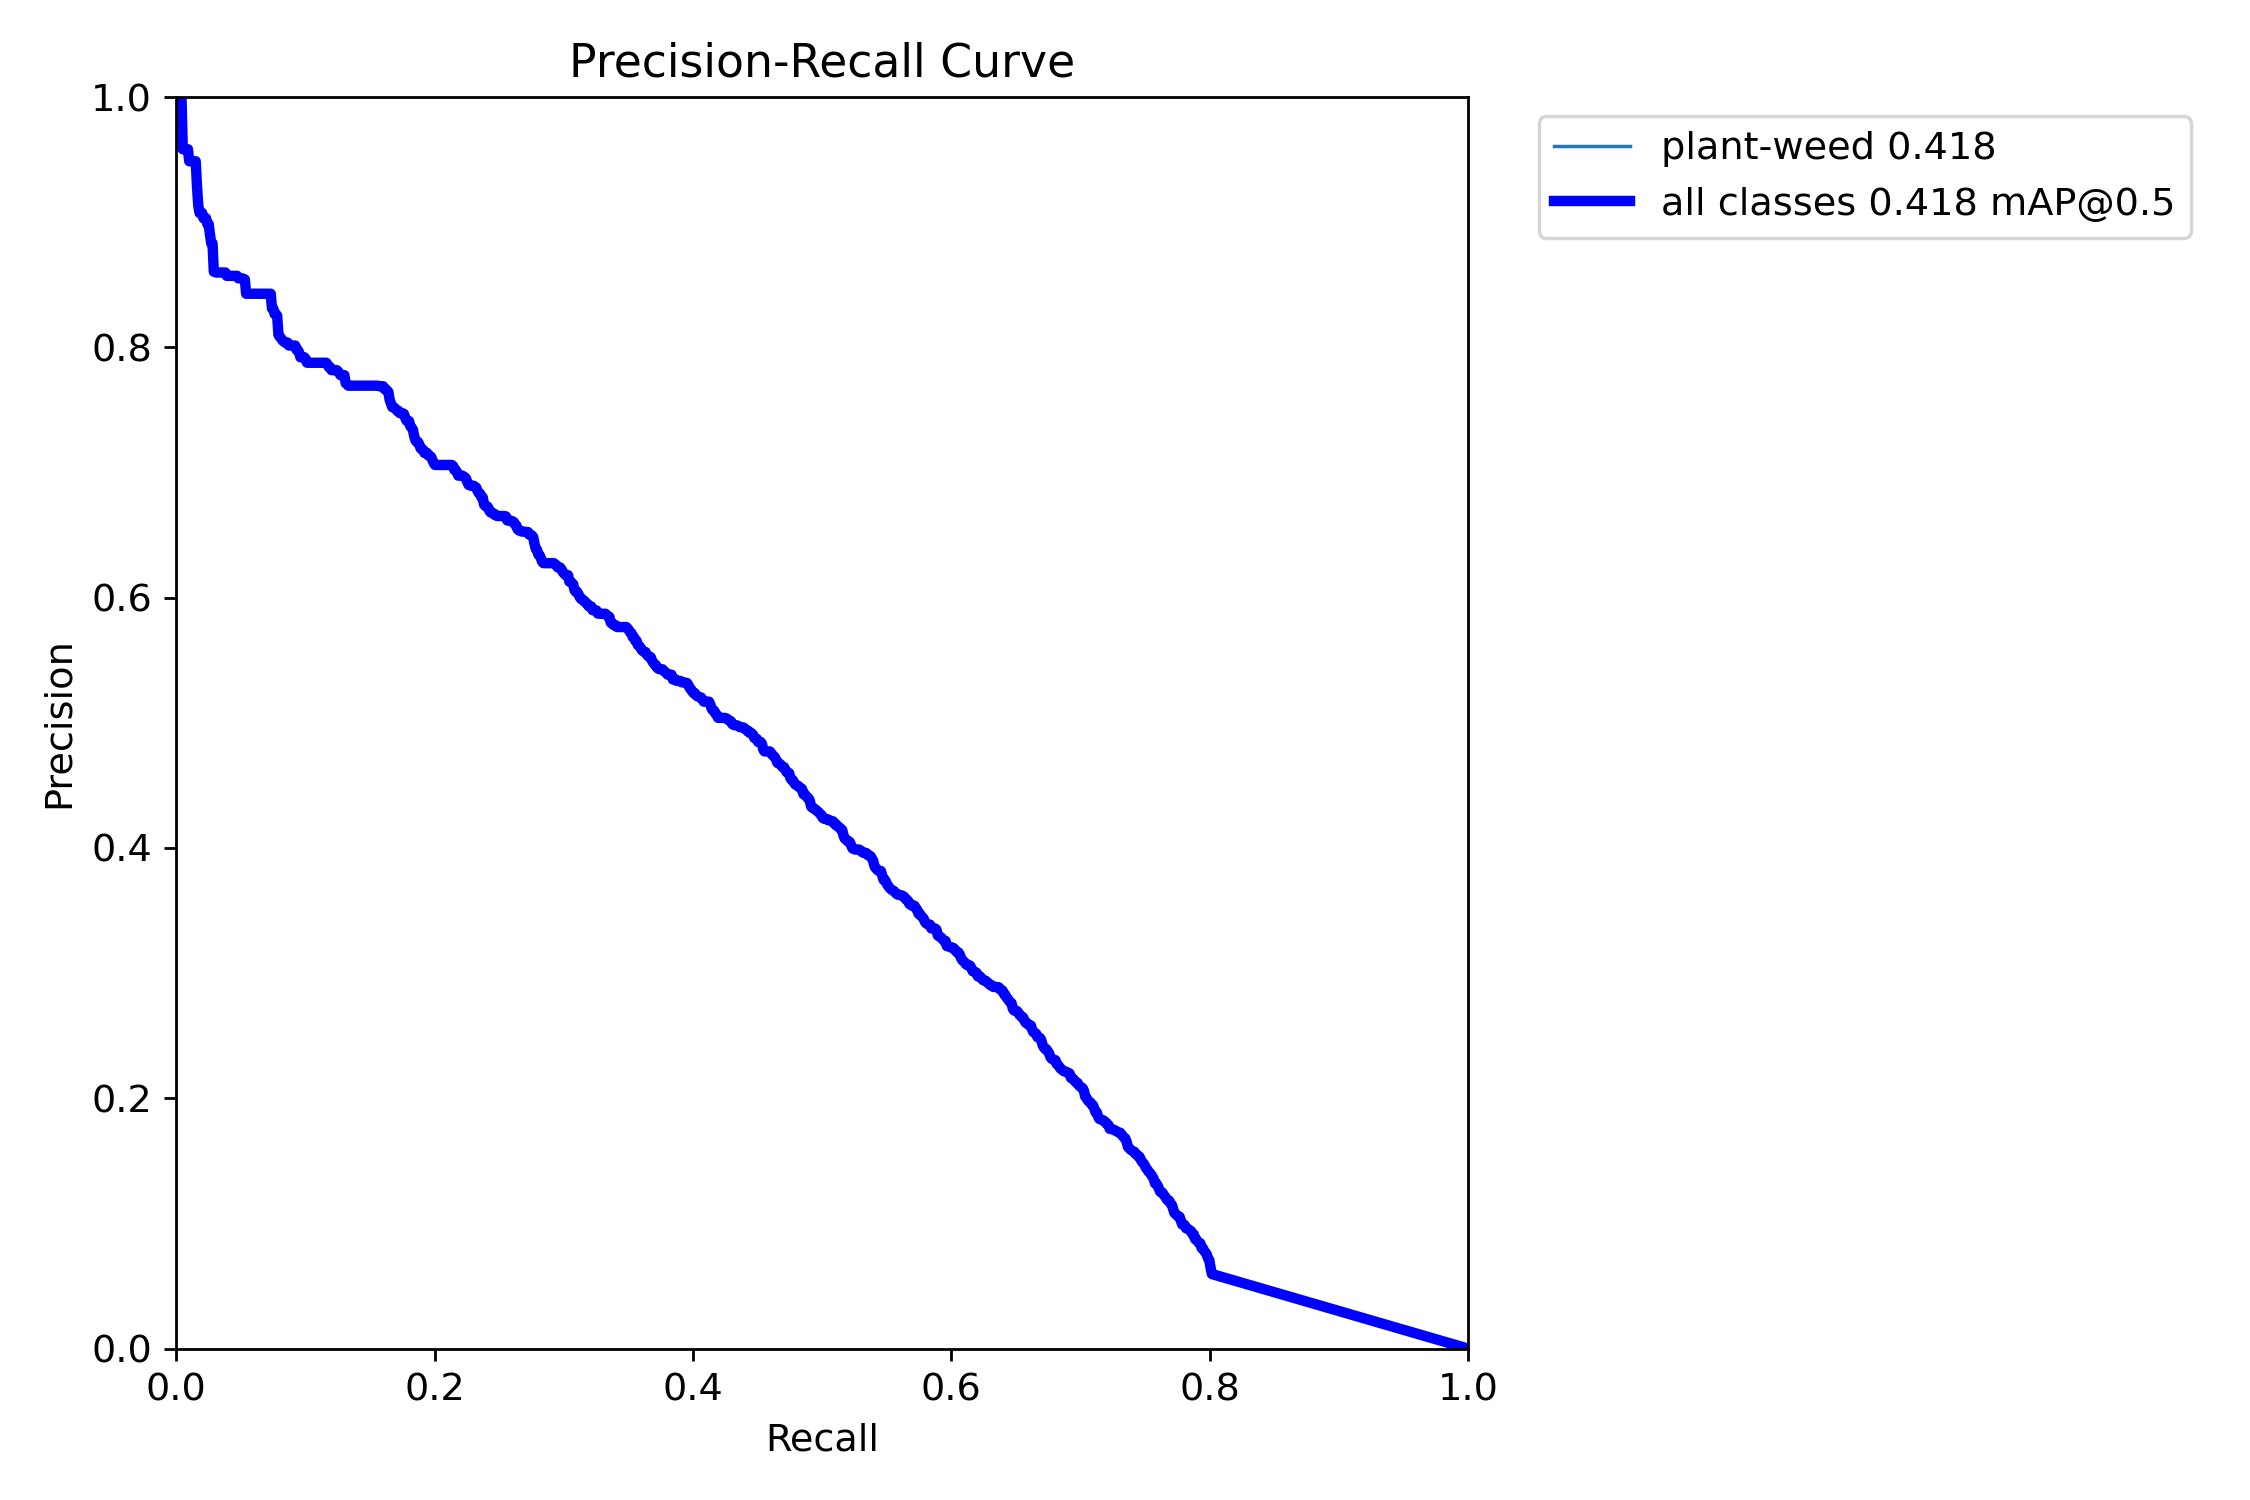

In [35]:
file_name = os.path.join(folder, "PR_curve.png")
Image(file_name, width=scale)

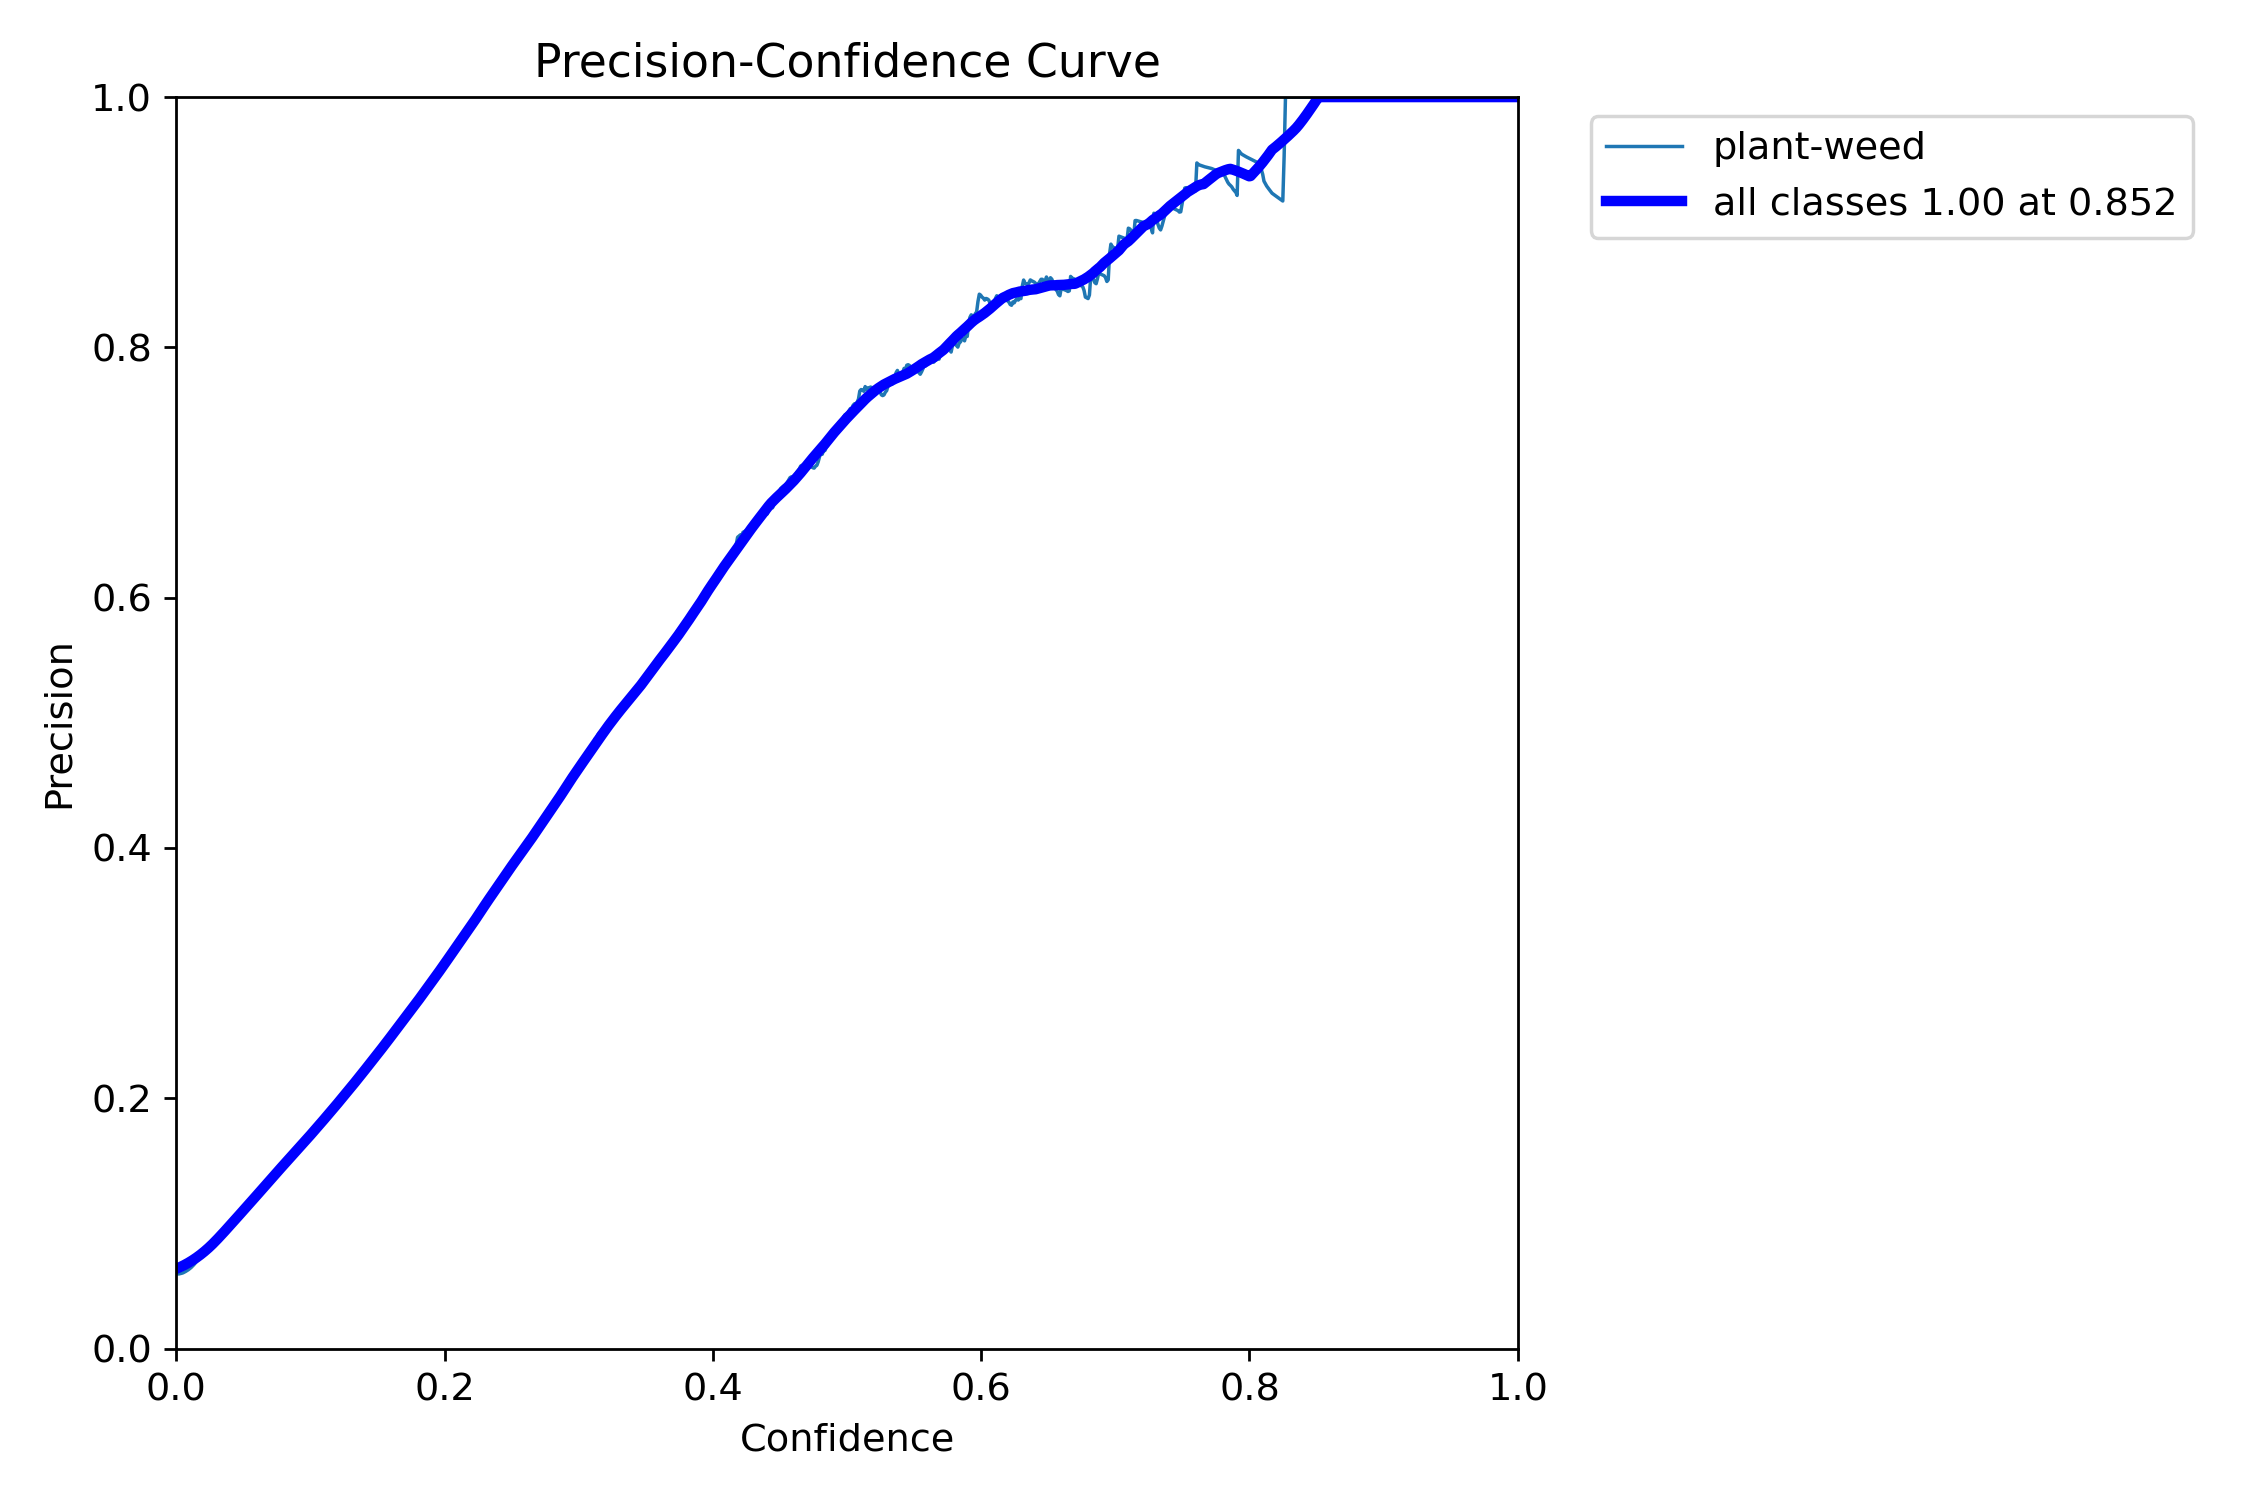

In [36]:
file_name = os.path.join(folder, "P_curve.png")
Image(file_name, width=scale)

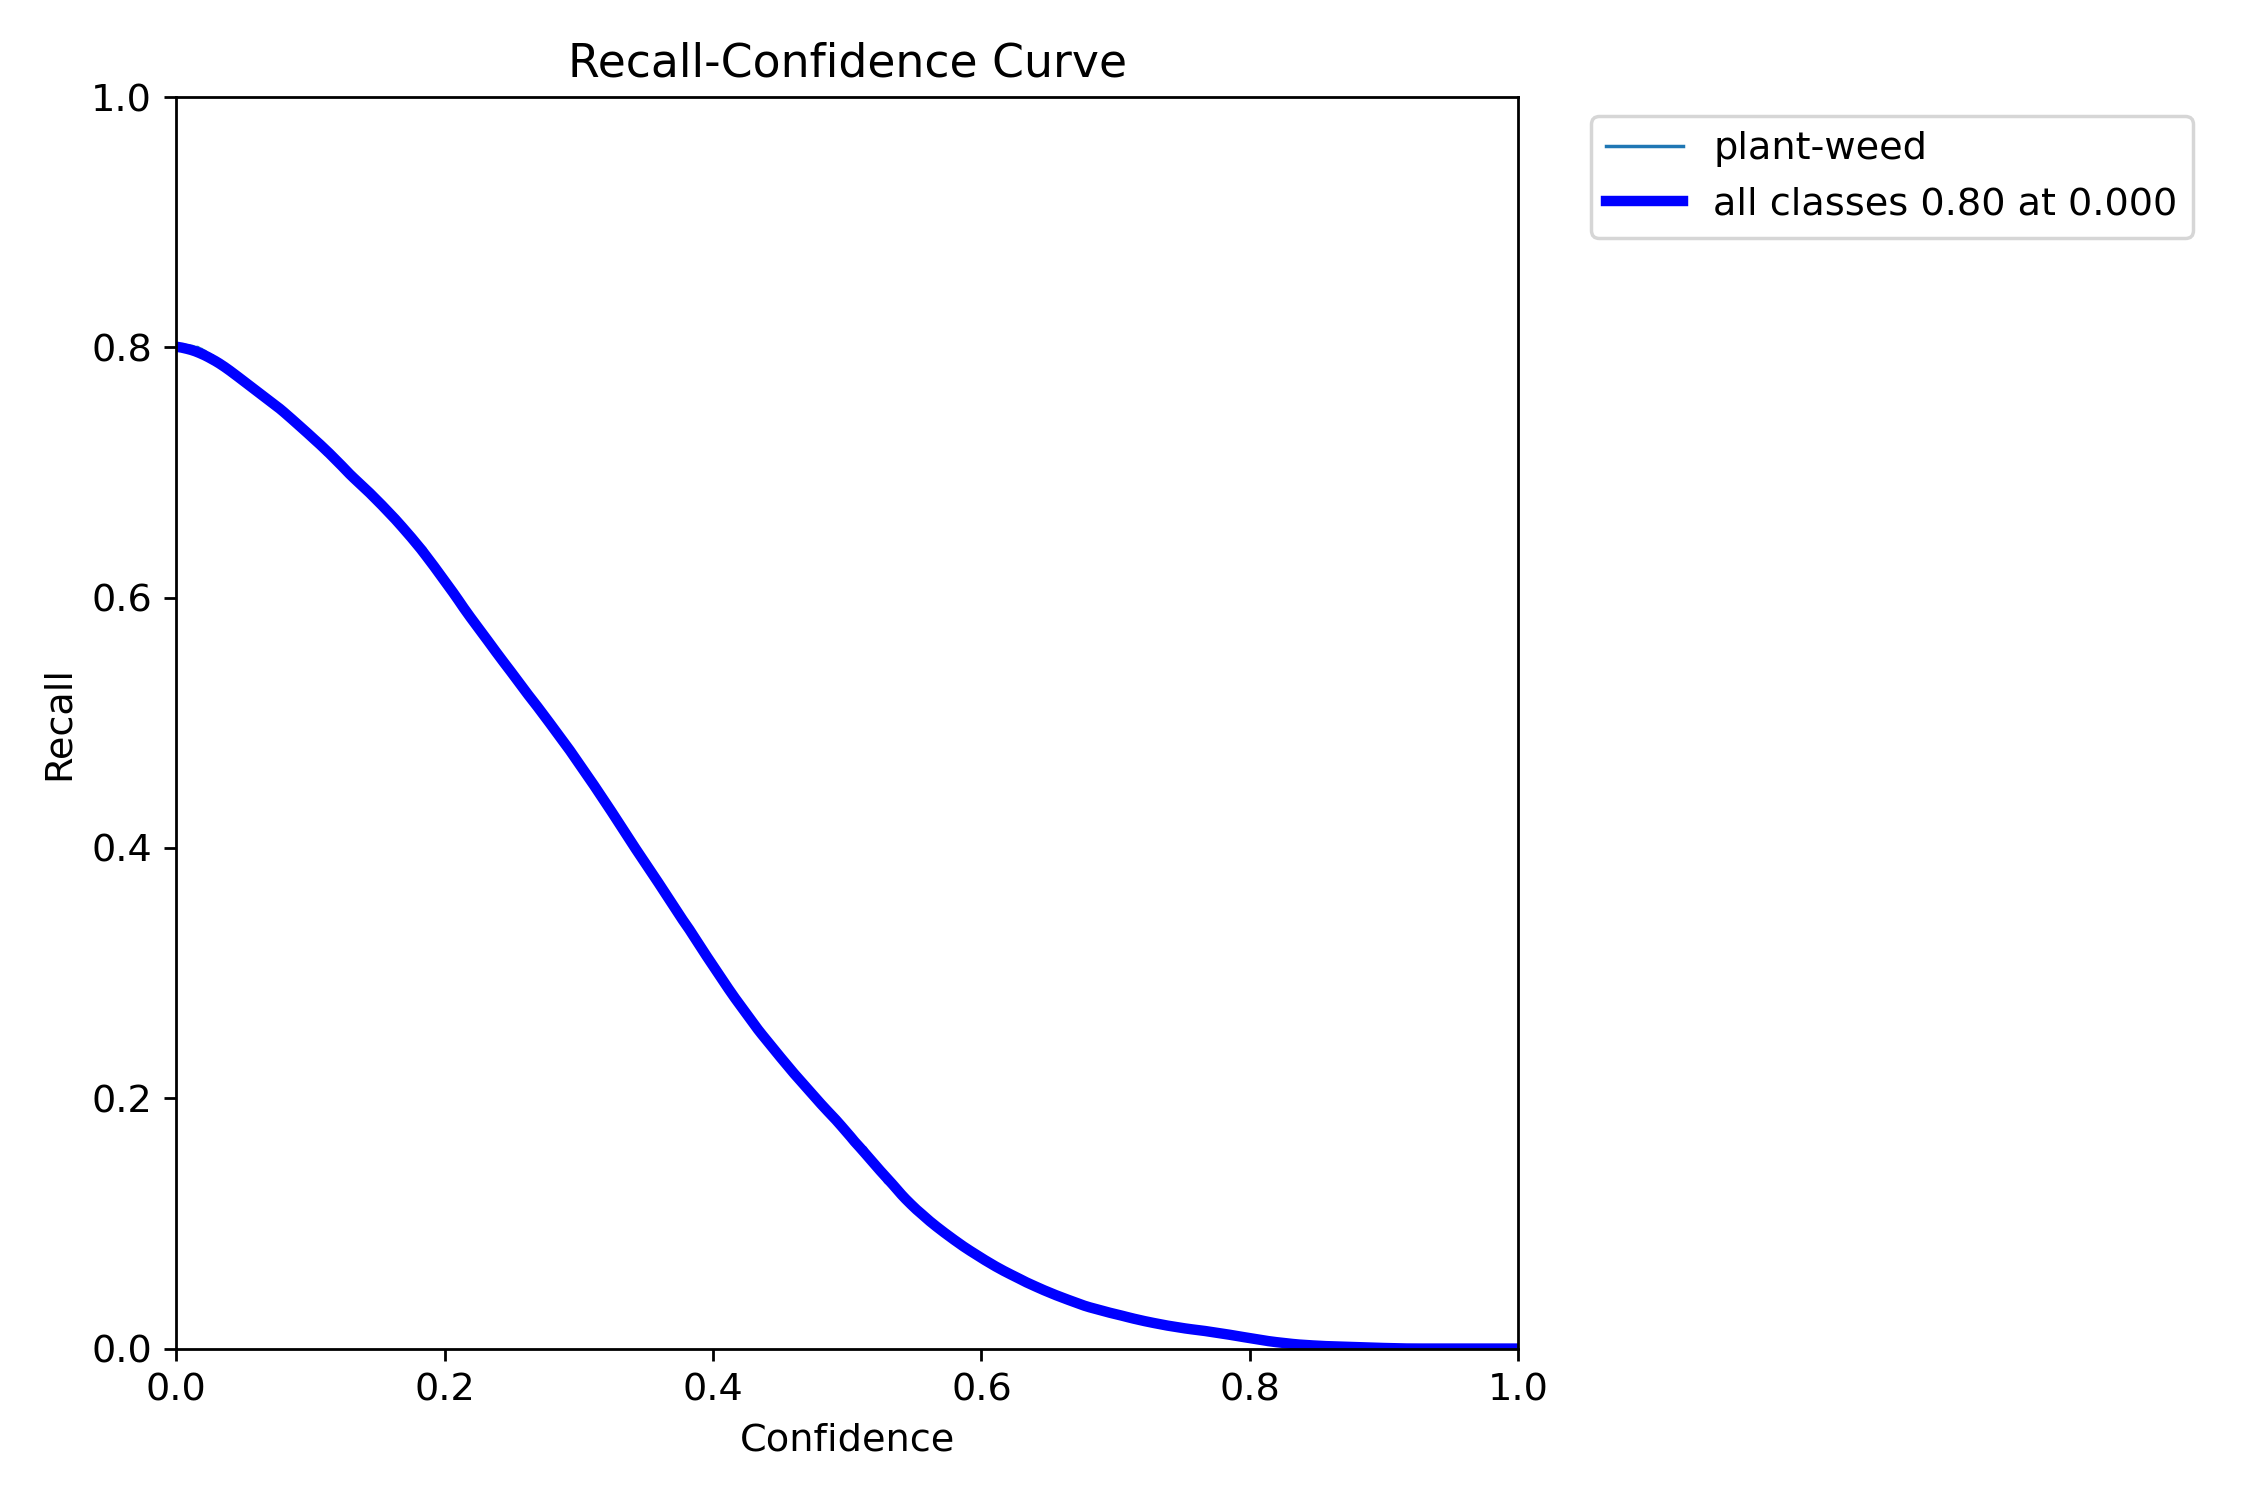

In [37]:
file_name = os.path.join(folder, "R_curve.png")
Image(file_name, width=scale)

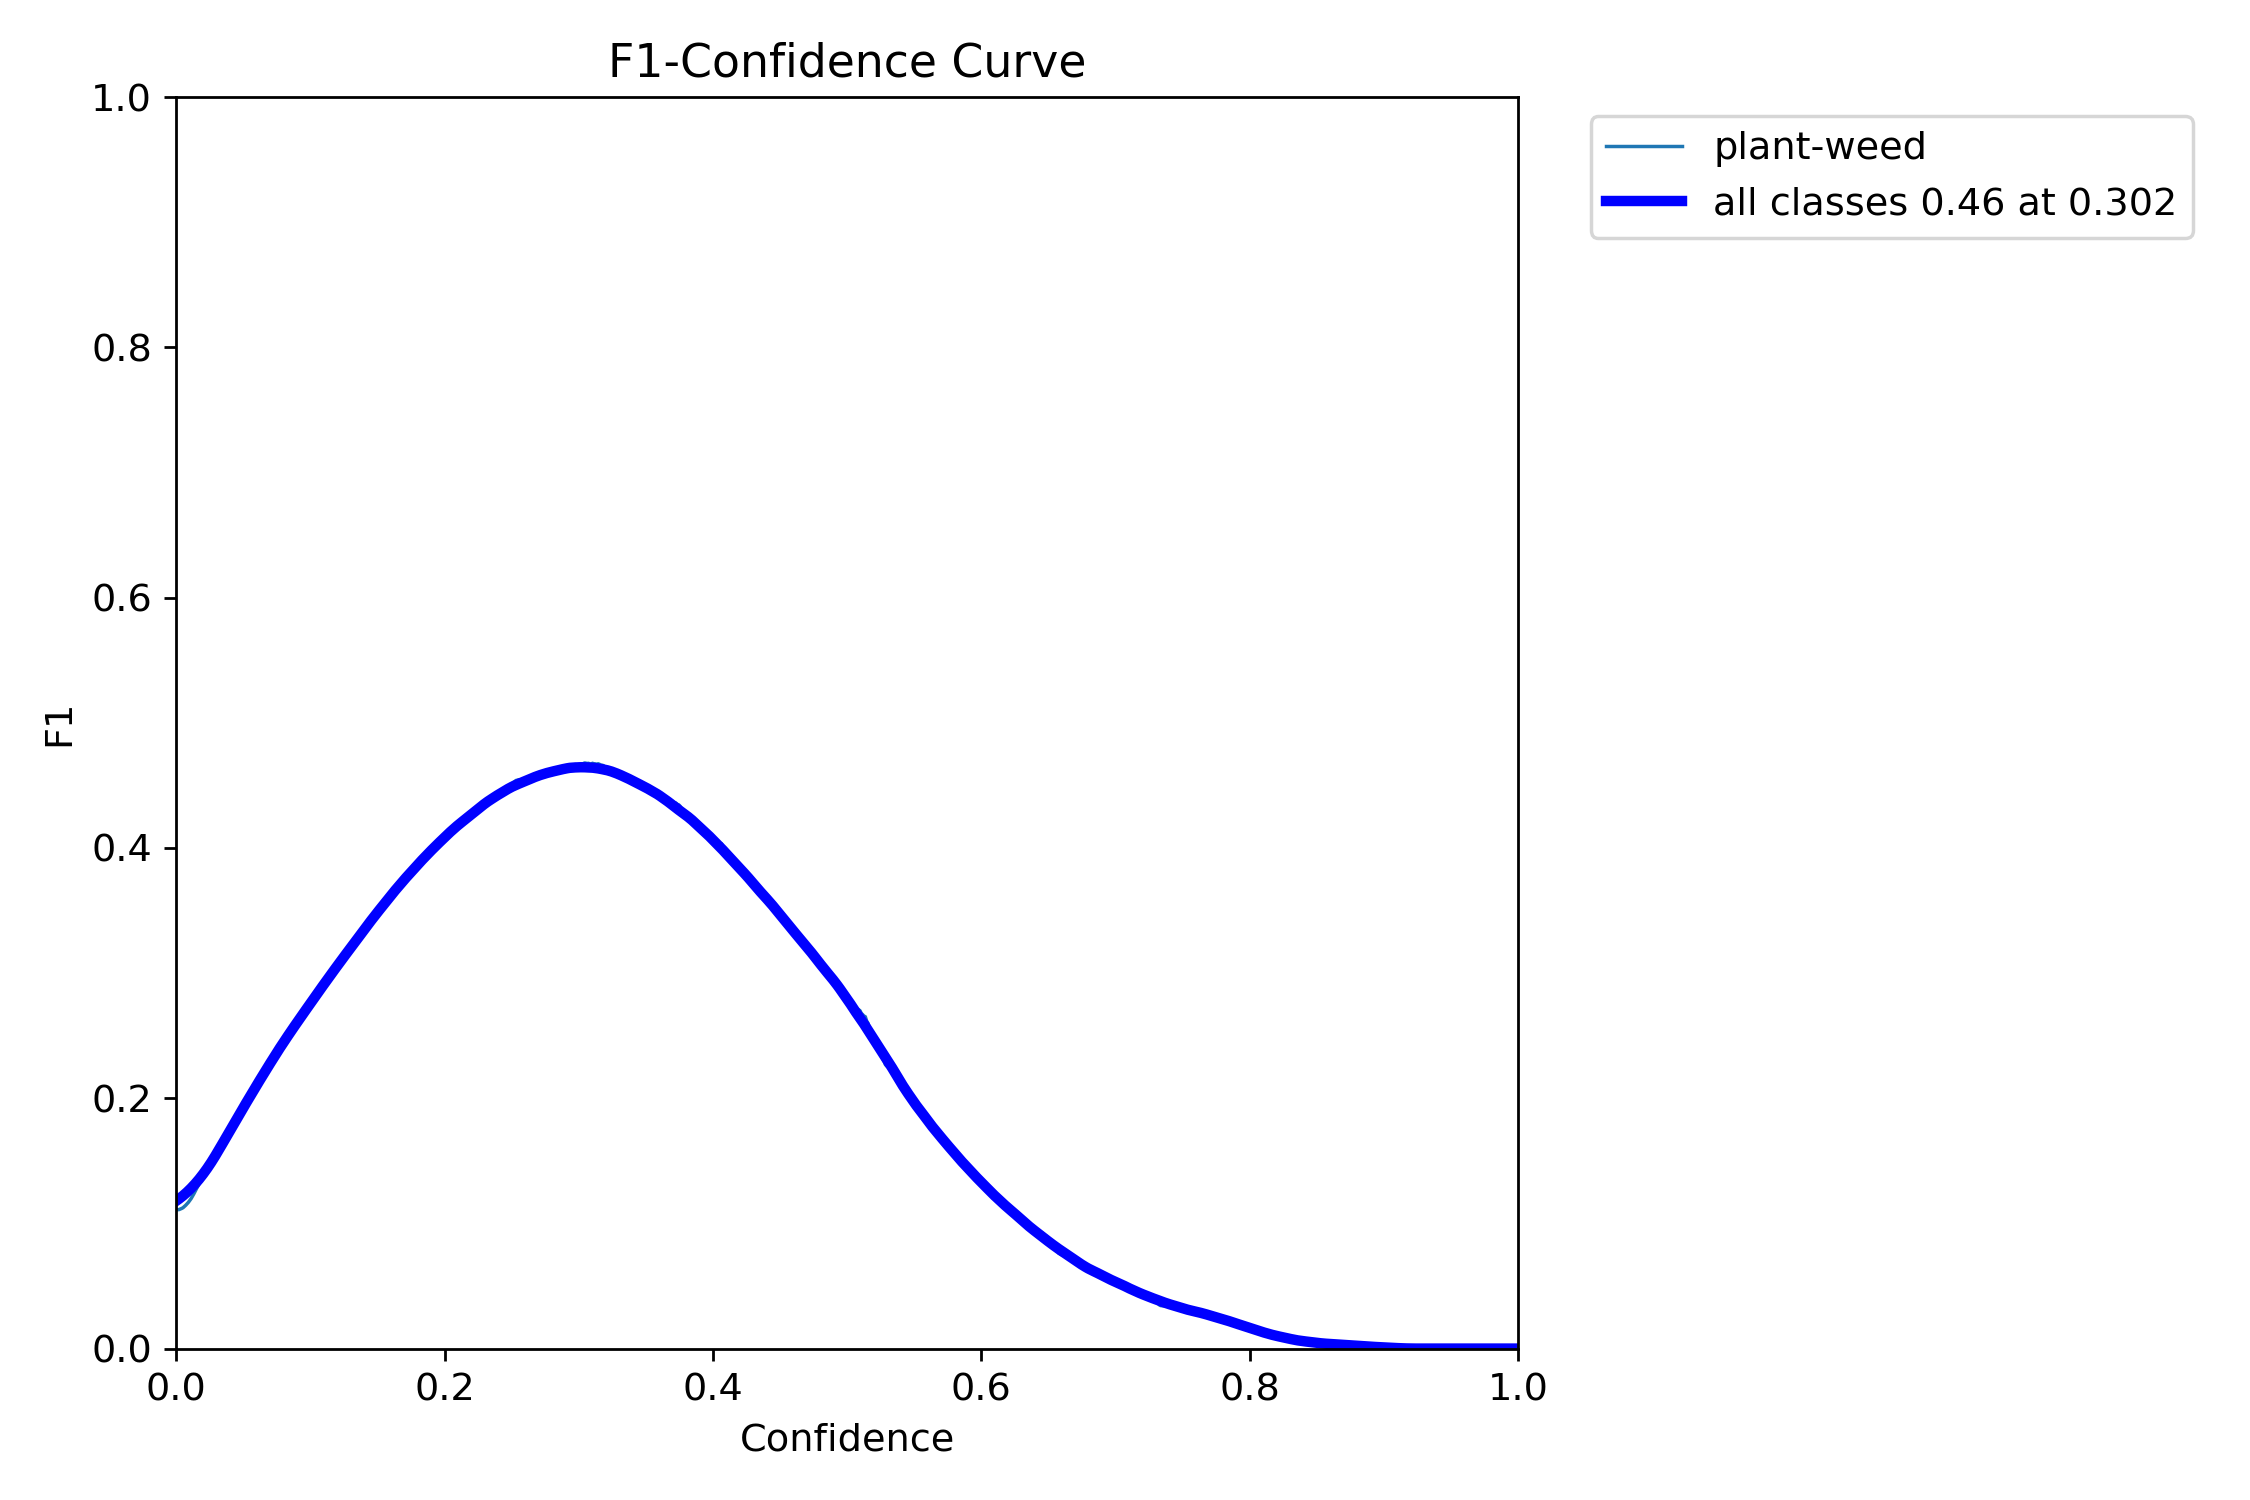

In [38]:
file_name = os.path.join(folder, "F1_curve.png")
Image(file_name, width=scale)

From the F1 curve, the confidence value that optimizes precision and recall is 0.231. In many cases a higher confidence value is desirable.

### Conclusiones

1. **Pérdidas de entrenamiento y validación  (Losses)**

- La pérdida de caja (box_loss), clasificación (cls_loss) y dfl (distribution focal loss) disminuyen a lo largo de las épocas tanto en entrenamiento como validación.
- Esto indica que el modelo está aprendiendo a ajustar mejor las predicciones, pero es importante verificar si hay sobreajuste (train_loss << val_loss).

2. **Métricas de validación (Precisión, Recall, mAP)**

- Precisión (precision), Recall y mAP aumentan progresivamente, lo que indica que el modelo mejora en la detección.
- El mAP50-95 es bastante bajo, lo que sugiere que el modelo tiene dificultades en predicciones a diferentes IoUs.

3. **Evolución de la Tasa de Aprendizaje (Learning Rate, LR)** 

- El learning rate comienza en 0.00006, aumenta progresivamente y sigue creciendo a lo largo del entrenamiento.
- Es clave verificar si en las últimas épocas empieza a descender o si se estabiliza en un valor óptimo.

----

# Métricas generales

## Graphs

In [39]:
# Define function to plot metrics
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(15, 5))
    plt.plot(df1["epoch"], df1[metric], label="Training 1", linestyle="--", marker="o", markersize=4)
    plt.plot(df2["epoch"], df2[metric], label="Training 2", linestyle="--", marker="s", markersize=4)
    plt.plot(df3["epoch"], df3[metric], label="Training 3", linestyle="--", marker="d", markersize=4)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Training and Validation Losses

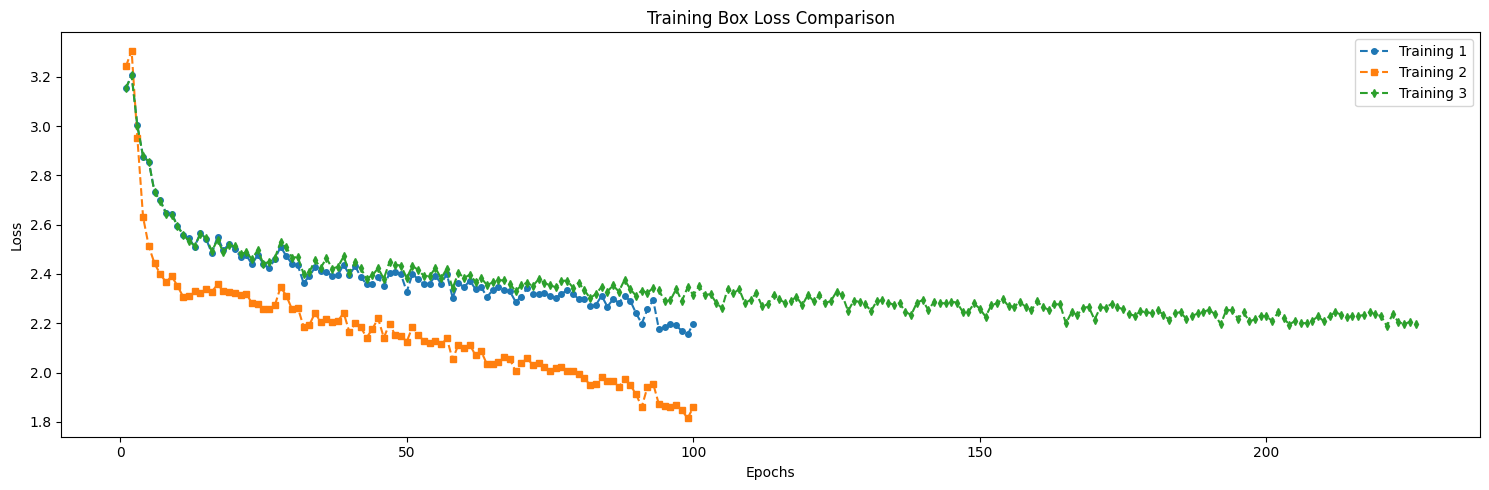

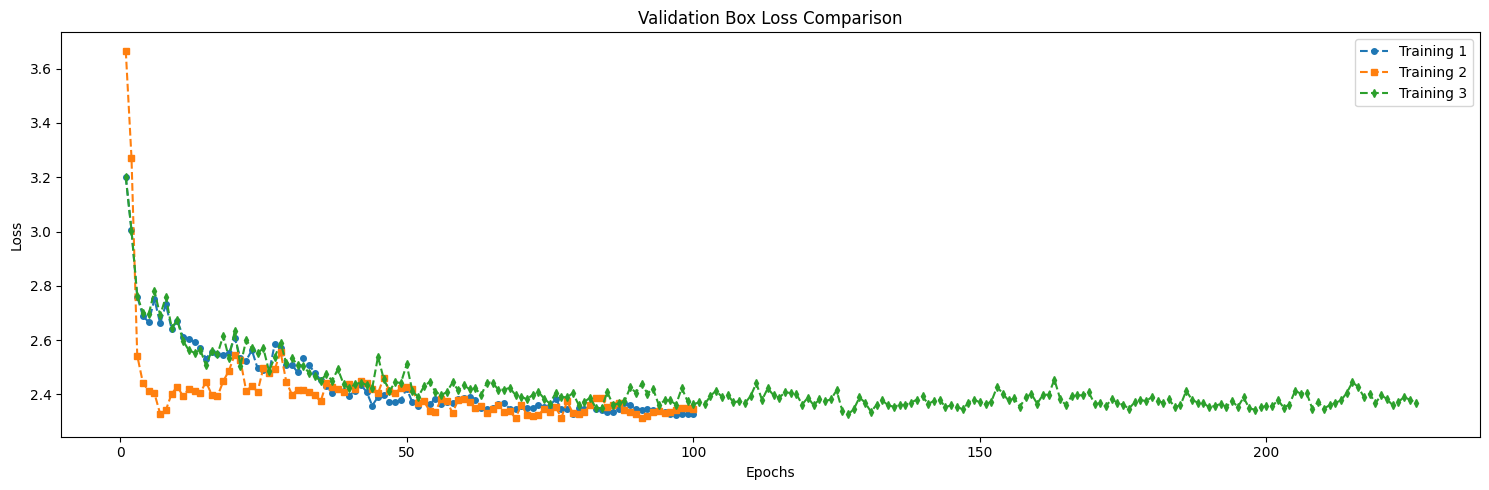

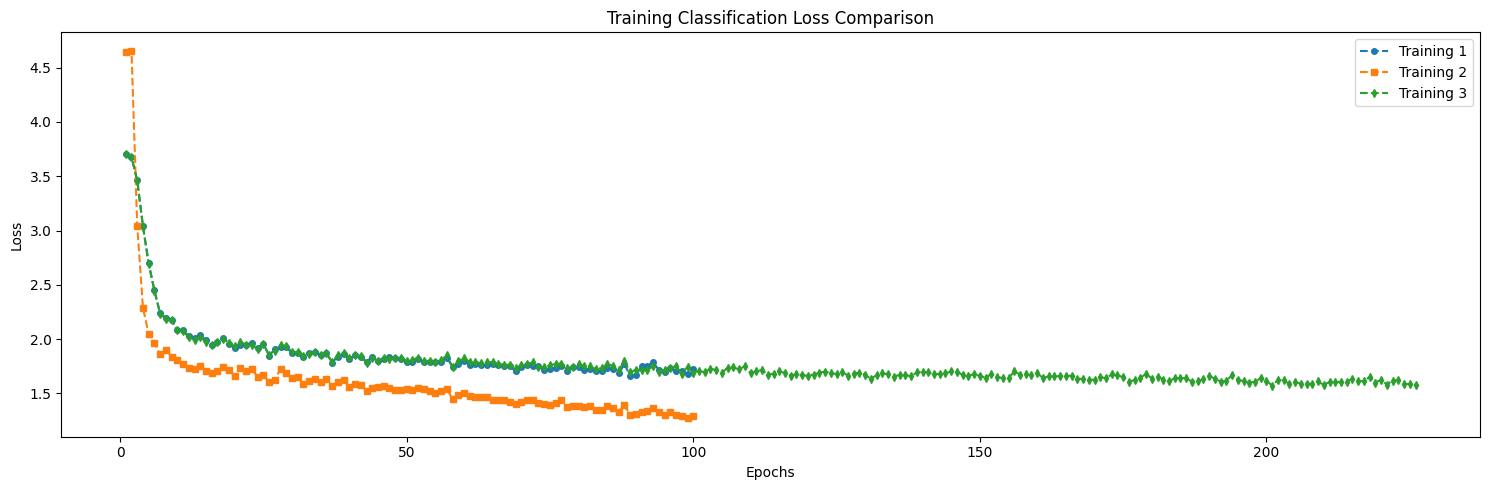

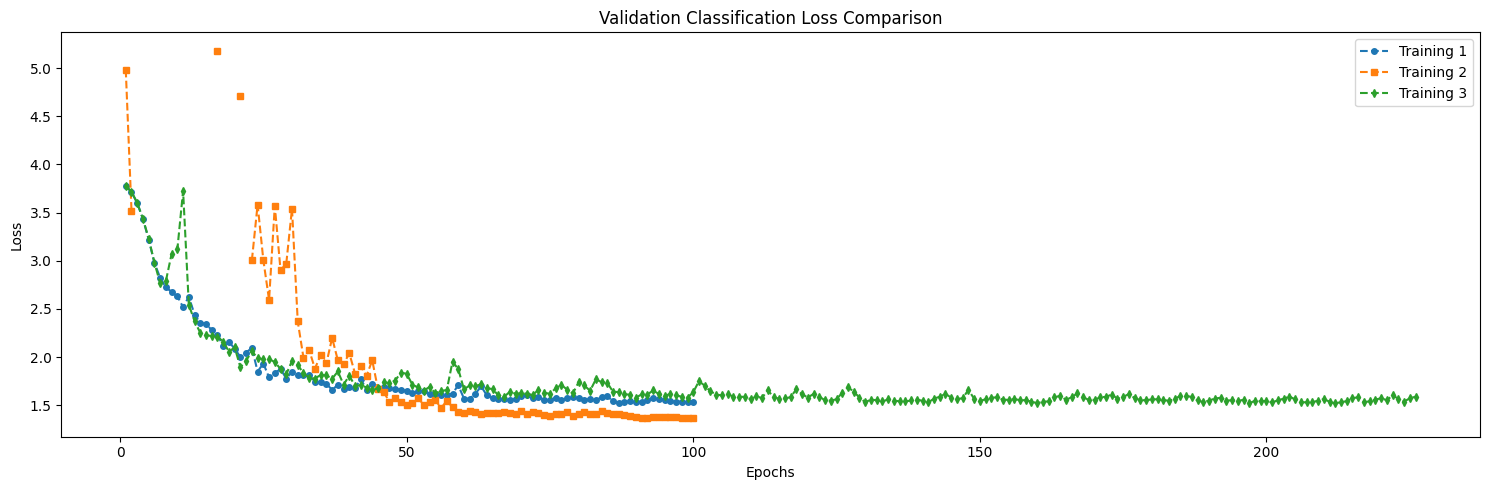

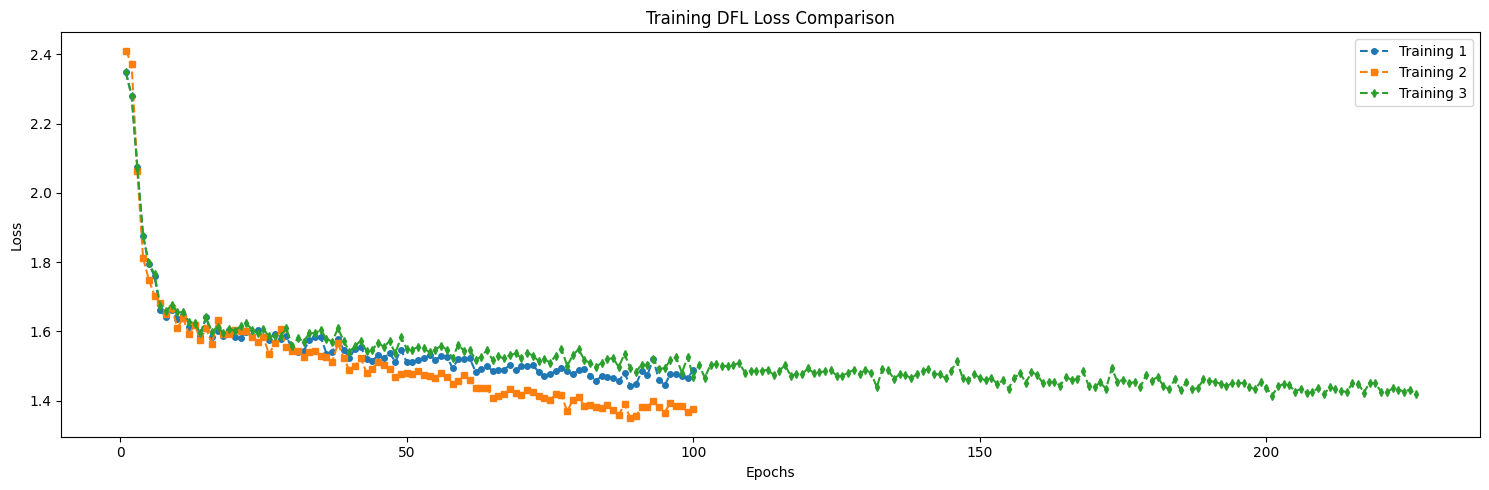

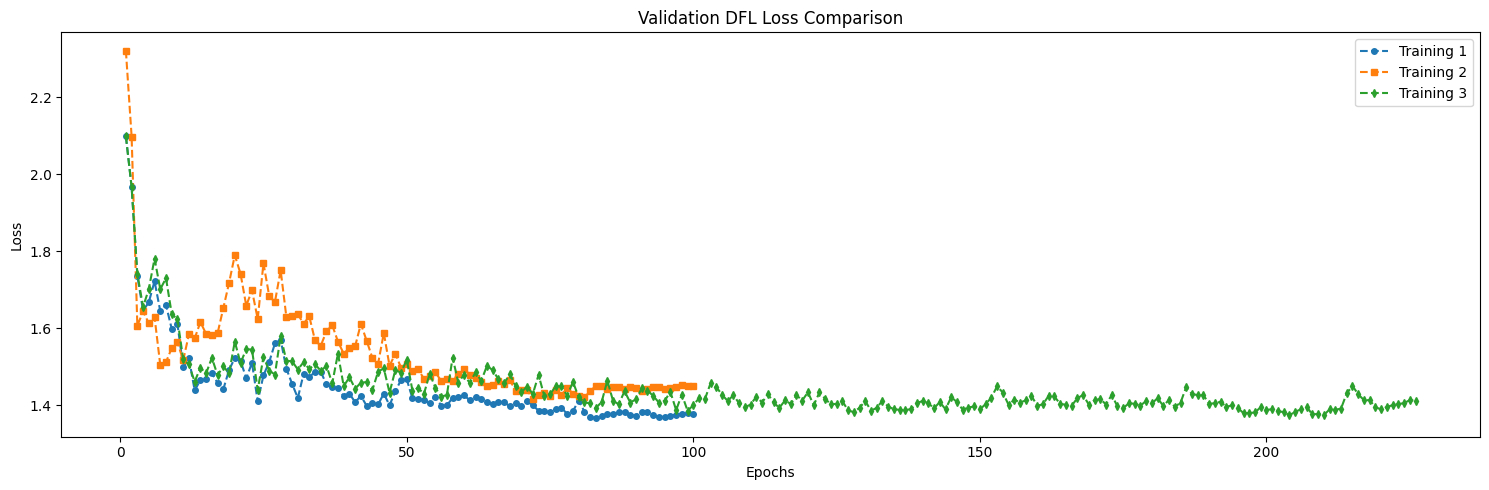

In [40]:
# Plot Training and Validation Losses
plot_metric("train/box_loss", "Loss", "Training Box Loss Comparison")
plot_metric("val/box_loss", "Loss", "Validation Box Loss Comparison")

plot_metric("train/cls_loss", "Loss", "Training Classification Loss Comparison")
plot_metric("val/cls_loss", "Loss", "Validation Classification Loss Comparison")

plot_metric("train/dfl_loss", "Loss", "Training DFL Loss Comparison")
plot_metric("val/dfl_loss", "Loss", "Validation DFL Loss Comparison")

### Performance Metrics

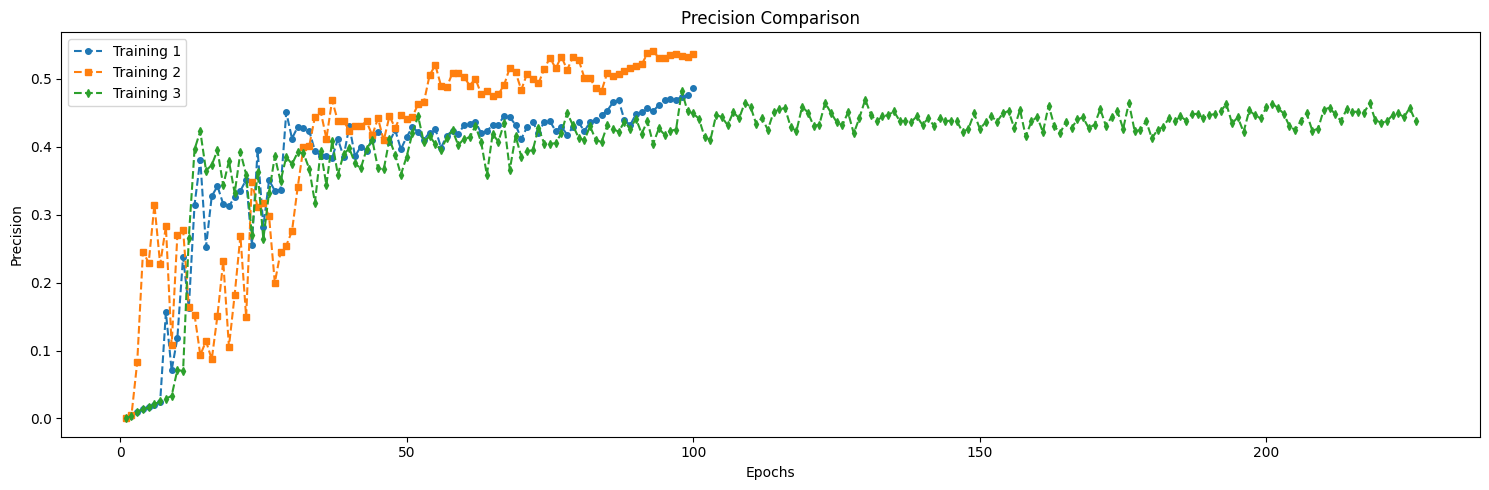

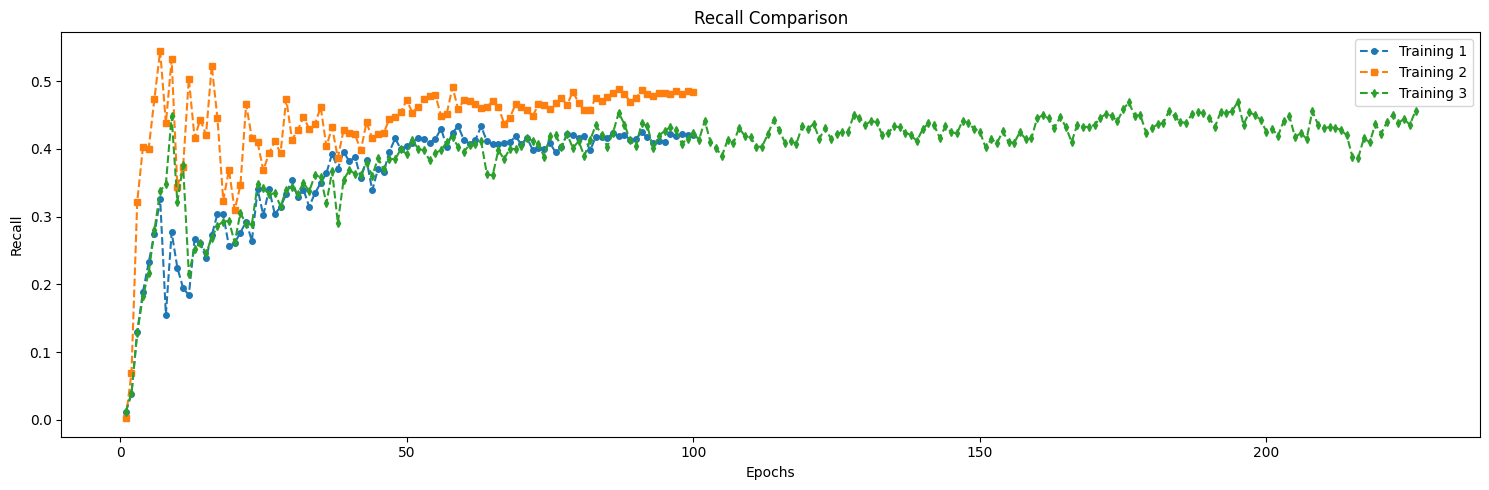

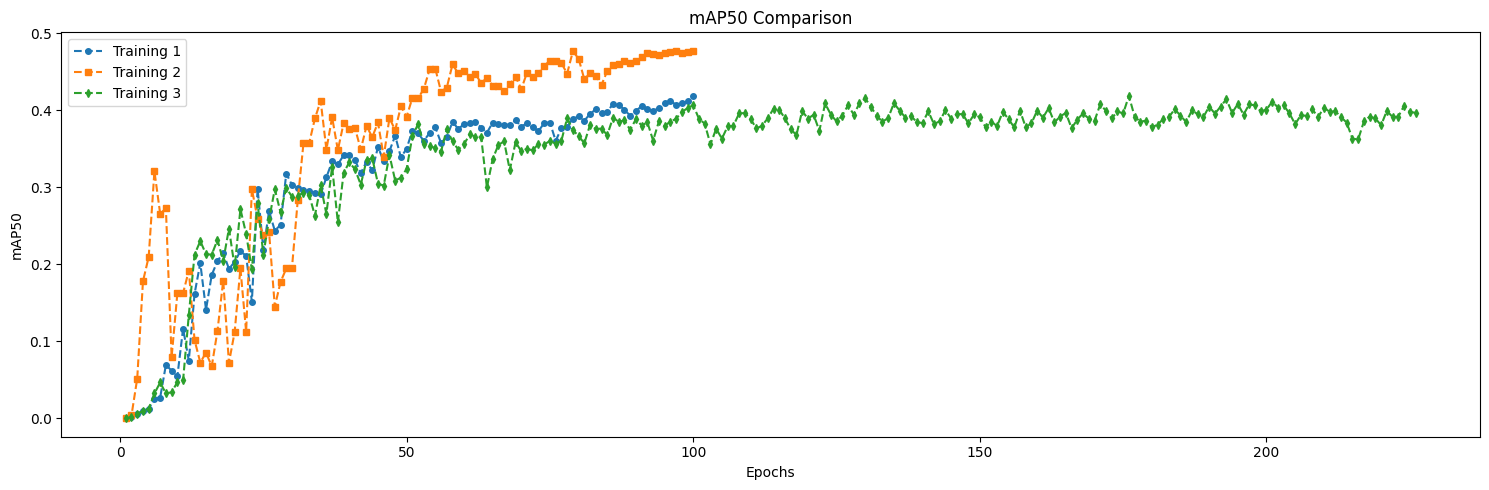

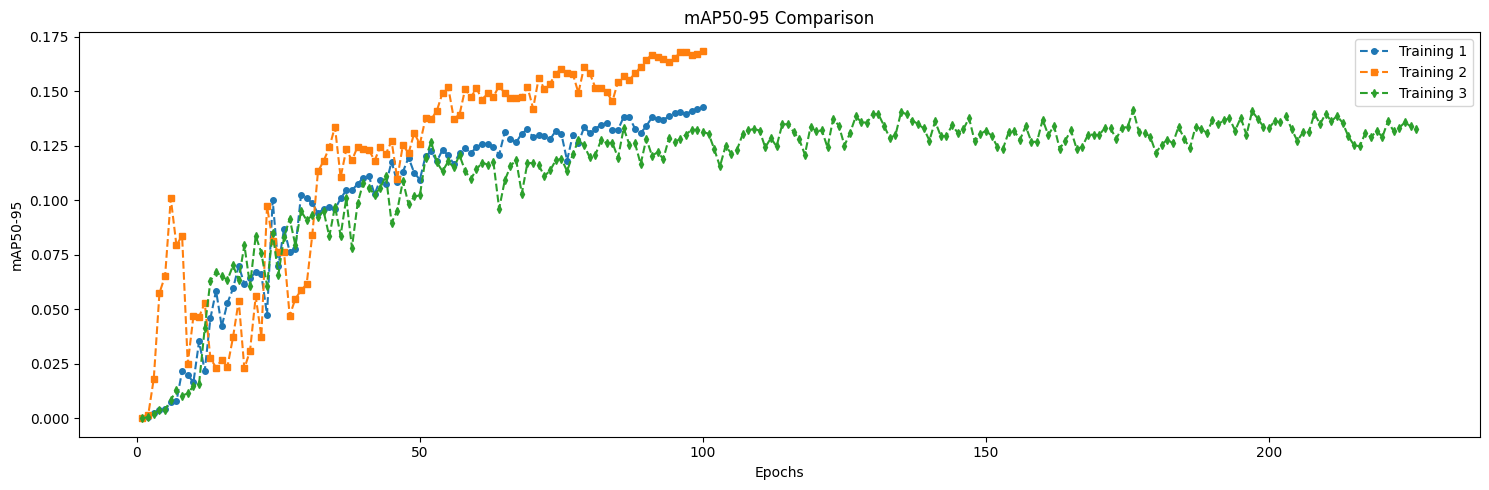

In [41]:
# Plot Performance Metrics
plot_metric("metrics/precision(B)", "Precision", "Precision Comparison")
plot_metric("metrics/recall(B)", "Recall", "Recall Comparison")
plot_metric("metrics/mAP50(B)", "mAP50", "mAP50 Comparison")
plot_metric("metrics/mAP50-95(B)", "mAP50-95", "mAP50-95 Comparison")

### Learning Rate

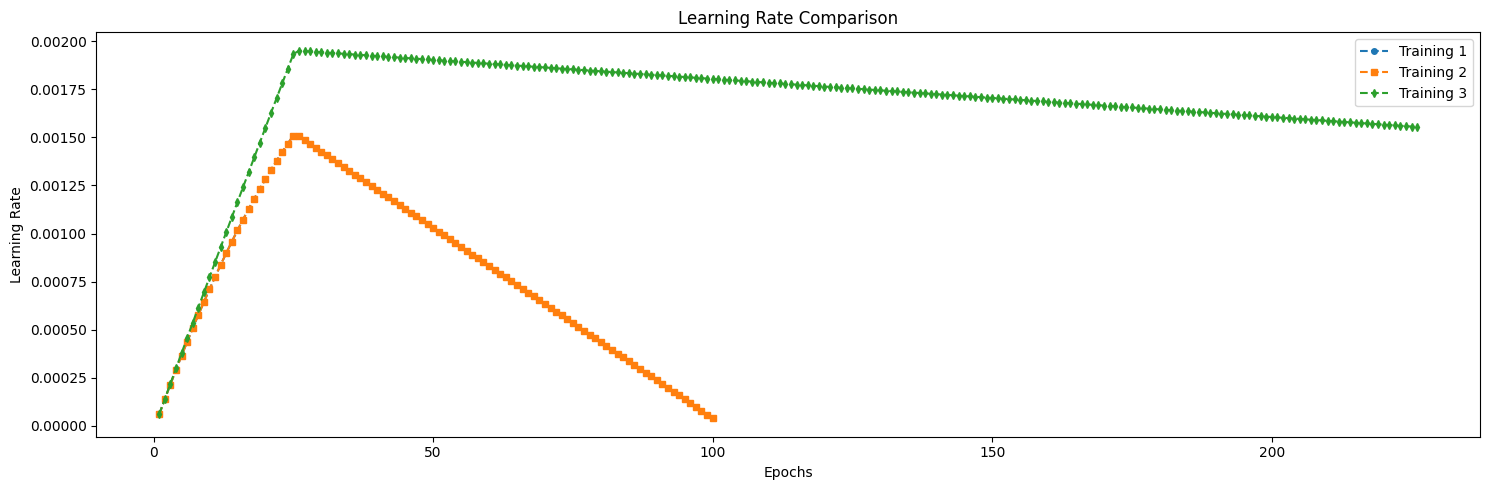

In [42]:
# Plot Learning Rate
plot_metric("lr/pg0", "Learning Rate", "Learning Rate Comparison")

## Resumen de los Experimentos

| Experiment | Dataset (Size) | Images | Tiles | Tags | Train/Valid (%) | Train Time (min) | Inf Time (ms) | Total detections | True Positives | False Positives | False Negatives | mAP@0.5 |
|------------|------|------|--------------|---------|------|------|----------------|---------------|---------------|---------------|---------------|--------|
| **1º TRAIN** | Small & Mid | 6 | 324 | 7669 | 67% / 33% | *8,54* | ***6,36*** | 2883 | 30,39% | 16,44% | **53,17%** | ***0,417*** |
| **2º TRAIN** | Small & Mid | 6 | 324 | 7669 | 67% / 33% | *13,73* | ***22,3*** | 2700 | **48,37%** | 10,78% | 40,85% | ***0,476*** |
| **3º TRAIN** | Small & Mid | 6 | 324 | 7669 | 67% / 33% | *19,08* | ***8,12*** | 4334 | 33,36% | **44,42%** | 22,22% | ***0,418*** |

## Comparación de los Entrenamientos

### Análisis del Dataset
1. **Cantidad de imágenes y etiquetas**:  
  -  

2. **Distribución de Train/Valid**:  
  -  

3. **Tamaño de imágenes (small vs mid)**:  
  -  

### Análisis de los Hiperparámetros
- **Modelo (yolov8n)**: Se mantuvo constante en todos los entrenamientos, lo que permite una comparación justa.  
- **Epochs (100)**: En los tres experimentos, el modelo parece alcanzar su rendimiento máximo antes de completar todas las épocas, lo que podría indicar que no se necesita entrenar tantas iteraciones.  
- **Batch Size (64)**: Se mantiene igual en todos los experimentos.  
- **Freeze (10)**: Congelar los primeros 10 capas del modelo en los tres entrenamientos podría estar limitando la capacidad de ajuste en las primeras etapas.  

### Análisis de Resultados
#### Métricas Generales
1. **Precisión (Precision) y Recall**:  
  -  

2. **mAP50**:  
  - 
  
3. **Confusión entre clases (False Positives y False Negatives)**:  
  - 
  
### Conclusiones Generales
1. 

# Conclusión Final


## Estrategias para Próximos Entrenamientos
1. **Dataset**
- 

2. **Hiperparámetros**
-  

3. **Optimización del Modelo**
- 

4. **Evaluación y Métricas**
-  